# Data Loading and Transformation

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys


df = pd.read_csv('data/itineraries_filtered.csv')
df.head()

legId  searchDate  flightDate startingAirport  \
0  fcdadfc373ea6d16b726f7ef7ca57659  2022-04-16  2022-04-25             ORD   
1  987b7fe3932c993fcee494bad2178b3f  2022-04-16  2022-04-17             ORD   
2  1ee950ecc949b7abb8bfa107e8aa81c4  2022-04-16  2022-04-23             MIA   
3  55a9ed5ef26919db086a638657c6e802  2022-04-16  2022-04-24             EWR   
4  69327c333f7c7e45c479085e9dc73d0d  2022-04-16  2022-04-22             ORD   

  destinationAirport fareBasisCode  elapsedDays  isBasicEconomy  isRefundable  \
0                LAX      M3AIZNN1            0           False         False   
1                LGA      G0AHZNN1            0           False         False   
2                JFK      B0APZNN1            0           False         False   
3                MIA      PL7QUEL1            0           False         False   
4                LGA      B0AJZNN1            0           False         False   

   isNonStop  baseFare  totalFare  seatsRemaining  totalTravelDistance  \
0       True    305.12     342.60               7               1745.0   
1       True    141.40     166.61               7                720.0   
2       True    772.09     844.60               7               1104.0   
3       True     27.91      44.60               7               1104.0   
4       True    169.30     196.60               6                720.0   

   segmentsDepartureTimeEpochSeconds  segmentsArrivalTimeEpochSeconds  \
0                         1650925200                       1650941220   
1                         1650213000                       1650220500   
2                         1650724200                       1650735720   
3                         1650846600                       1650858420   
4                         1650648600                       1650656100   

  segmentsAirlineCode segmentsEquipmentDescription  segmentsDurationInSeconds  \
0                  AA               Boeing 737-800                      16020   
1                  AA               Boeing 737-800                       7500   
2                  AA               Boeing 737-800                      11520   
3                  B6                  Airbus A320                      11820   
4                  B6                  Airbus A319                       7500   

  segmentsCabinCode  
0             coach  
1             coach  
2             coach  
3             coach  
4             coach

In [3]:
# Transform segmentsDepartureTimeEpochSeconds and segmentsArrivalTimeEpochSeconds to datetime
df['segmentsDepartureTime'] = pd.to_datetime(df['segmentsDepartureTimeEpochSeconds'], unit='s')
df['segmentsArrivalTime'] = pd.to_datetime(df['segmentsArrivalTimeEpochSeconds'], unit='s')

# Transform segmentsDurationSeconds to HH:MM:SS
df['segmentsDuration'] = pd.to_timedelta(df['segmentsDurationInSeconds'], unit='s')

df.head()

legId  searchDate  flightDate startingAirport  \
0  fcdadfc373ea6d16b726f7ef7ca57659  2022-04-16  2022-04-25             ORD   
1  987b7fe3932c993fcee494bad2178b3f  2022-04-16  2022-04-17             ORD   
2  1ee950ecc949b7abb8bfa107e8aa81c4  2022-04-16  2022-04-23             MIA   
3  55a9ed5ef26919db086a638657c6e802  2022-04-16  2022-04-24             EWR   
4  69327c333f7c7e45c479085e9dc73d0d  2022-04-16  2022-04-22             ORD   

  destinationAirport fareBasisCode  elapsedDays  isBasicEconomy  isRefundable  \
0                LAX      M3AIZNN1            0           False         False   
1                LGA      G0AHZNN1            0           False         False   
2                JFK      B0APZNN1            0           False         False   
3                MIA      PL7QUEL1            0           False         False   
4                LGA      B0AJZNN1            0           False         False   

   isNonStop  ...  totalTravelDistance  segmentsDepartureTimeEpochSeconds  \
0       True  ...               1745.0                         1650925200   
1       True  ...                720.0                         1650213000   
2       True  ...               1104.0                         1650724200   
3       True  ...               1104.0                         1650846600   
4       True  ...                720.0                         1650648600   

   segmentsArrivalTimeEpochSeconds  segmentsAirlineCode  \
0                       1650941220                   AA   
1                       1650220500                   AA   
2                       1650735720                   AA   
3                       1650858420                   B6   
4                       1650656100                   B6   

   segmentsEquipmentDescription  segmentsDurationInSeconds segmentsCabinCode  \
0                Boeing 737-800                      16020             coach   
1                Boeing 737-800                       7500             coach   
2                Boeing 737-800                      11520             coach   
3                   Airbus A320                      11820             coach   
4                   Airbus A319                       7500             coach   

  segmentsDepartureTime  segmentsArrivalTime segmentsDuration  
0   2022-04-25 22:20:00  2022-04-26 02:47:00  0 days 04:27:00  
1   2022-04-17 16:30:00  2022-04-17 18:35:00  0 days 02:05:00  
2   2022-04-23 14:30:00  2022-04-23 17:42:00  0 days 03:12:00  
3   2022-04-25 00:30:00  2022-04-25 03:47:00  0 days 03:17:00  
4   2022-04-22 17:30:00  2022-04-22 19:35:00  0 days 02:05:00  

[5 rows x 23 columns]

In [4]:
# Print type of data in each column
print(df.dtypes)

legId                                         object
searchDate                                    object
flightDate                                    object
startingAirport                               object
destinationAirport                            object
fareBasisCode                                 object
elapsedDays                                    int64
isBasicEconomy                                  bool
isRefundable                                    bool
isNonStop                                       bool
baseFare                                     float64
totalFare                                    float64
seatsRemaining                                 int64
totalTravelDistance                          float64
segmentsDepartureTimeEpochSeconds              int64
segmentsArrivalTimeEpochSeconds                int64
segmentsAirlineCode                           object
segmentsEquipmentDescription                  object
segmentsDurationInSeconds                     

# EDA of each column

In [21]:
# Iterate through each column, if the column is of type object, print the unique values, otherwise print the min, max, mean, median, mode, IQR values
for column in df.columns:
    if df[column].dtype == 'object':
        if "Date" in column:
            # Find the range of dates
            print(f'{column}: min={df[column].min()}, max={df[column].max()}')
            print("\n")
        else:
            print(f'{column}: {df[column].unique()}')
            print("\n")
    elif df[column].dtype == 'bool':
        continue
    elif df[column].dtype == 'datetime64[ns]':
        print(f'{column}: min={df[column].min()}, max={df[column].max()}')
        print("\n")
        
    elif df[column].dtype == 'timedelta64[ns]':
        continue
    else:
        # Find the min, max, mean, median, mode, IQR values
        print(f'{column}: min={df[column].min()}, max={df[column].max()}, mean={df[column].mean()}, median={df[column].median()}, mode={df[column].mode()[0]}, IQR={df[column].quantile(0.75) - df[column].quantile(0.25)}')
        print("\n")

legId: ['fcdadfc373ea6d16b726f7ef7ca57659' '987b7fe3932c993fcee494bad2178b3f'
 '1ee950ecc949b7abb8bfa107e8aa81c4' ... 'f032e0dd46775297dcd6b6cb38858963'
 '537372f051659793745011139f630a06' '4923faa3850ccaefed643c9266a53b19']


searchDate: min=2022-04-16, max=2022-10-05


flightDate: min=2022-04-17 00:00:00, max=2022-11-19 00:00:00


startingAirport: ['ORD' 'MIA' 'EWR' 'DTW' 'CLT' 'DFW' 'ATL' 'LAX' 'LGA' 'BOS' 'DEN' 'SFO'
 'PHL' 'JFK' 'IAD' 'OAK']


destinationAirport: ['LAX' 'LGA' 'JFK' 'MIA' 'EWR' 'SFO' 'DFW' 'BOS' 'ORD' 'DEN' 'PHL' 'DTW'
 'IAD' 'CLT' 'ATL' 'OAK']


fareBasisCode: ['M3AIZNN1' 'G0AHZNN1' 'B0APZNN1' ... 'VVAHKNN1' 'NVAHZOB3' 'QVAKZTB3']


elapsedDays: min=0, max=1, mean=0.05214313873872241, median=0.0, mode=0, IQR=0.0


baseFare: min=0.01, max=4416.74, mean=219.2770932250625, median=186.98, mode=133.95, IQR=153.48999999999998


totalFare: min=19.59, max=4762.6, mean=251.32511679754944, median=215.6, mode=148.6, IQR=165.00000000000003


seatsRemaining: min=0, max=10, mea

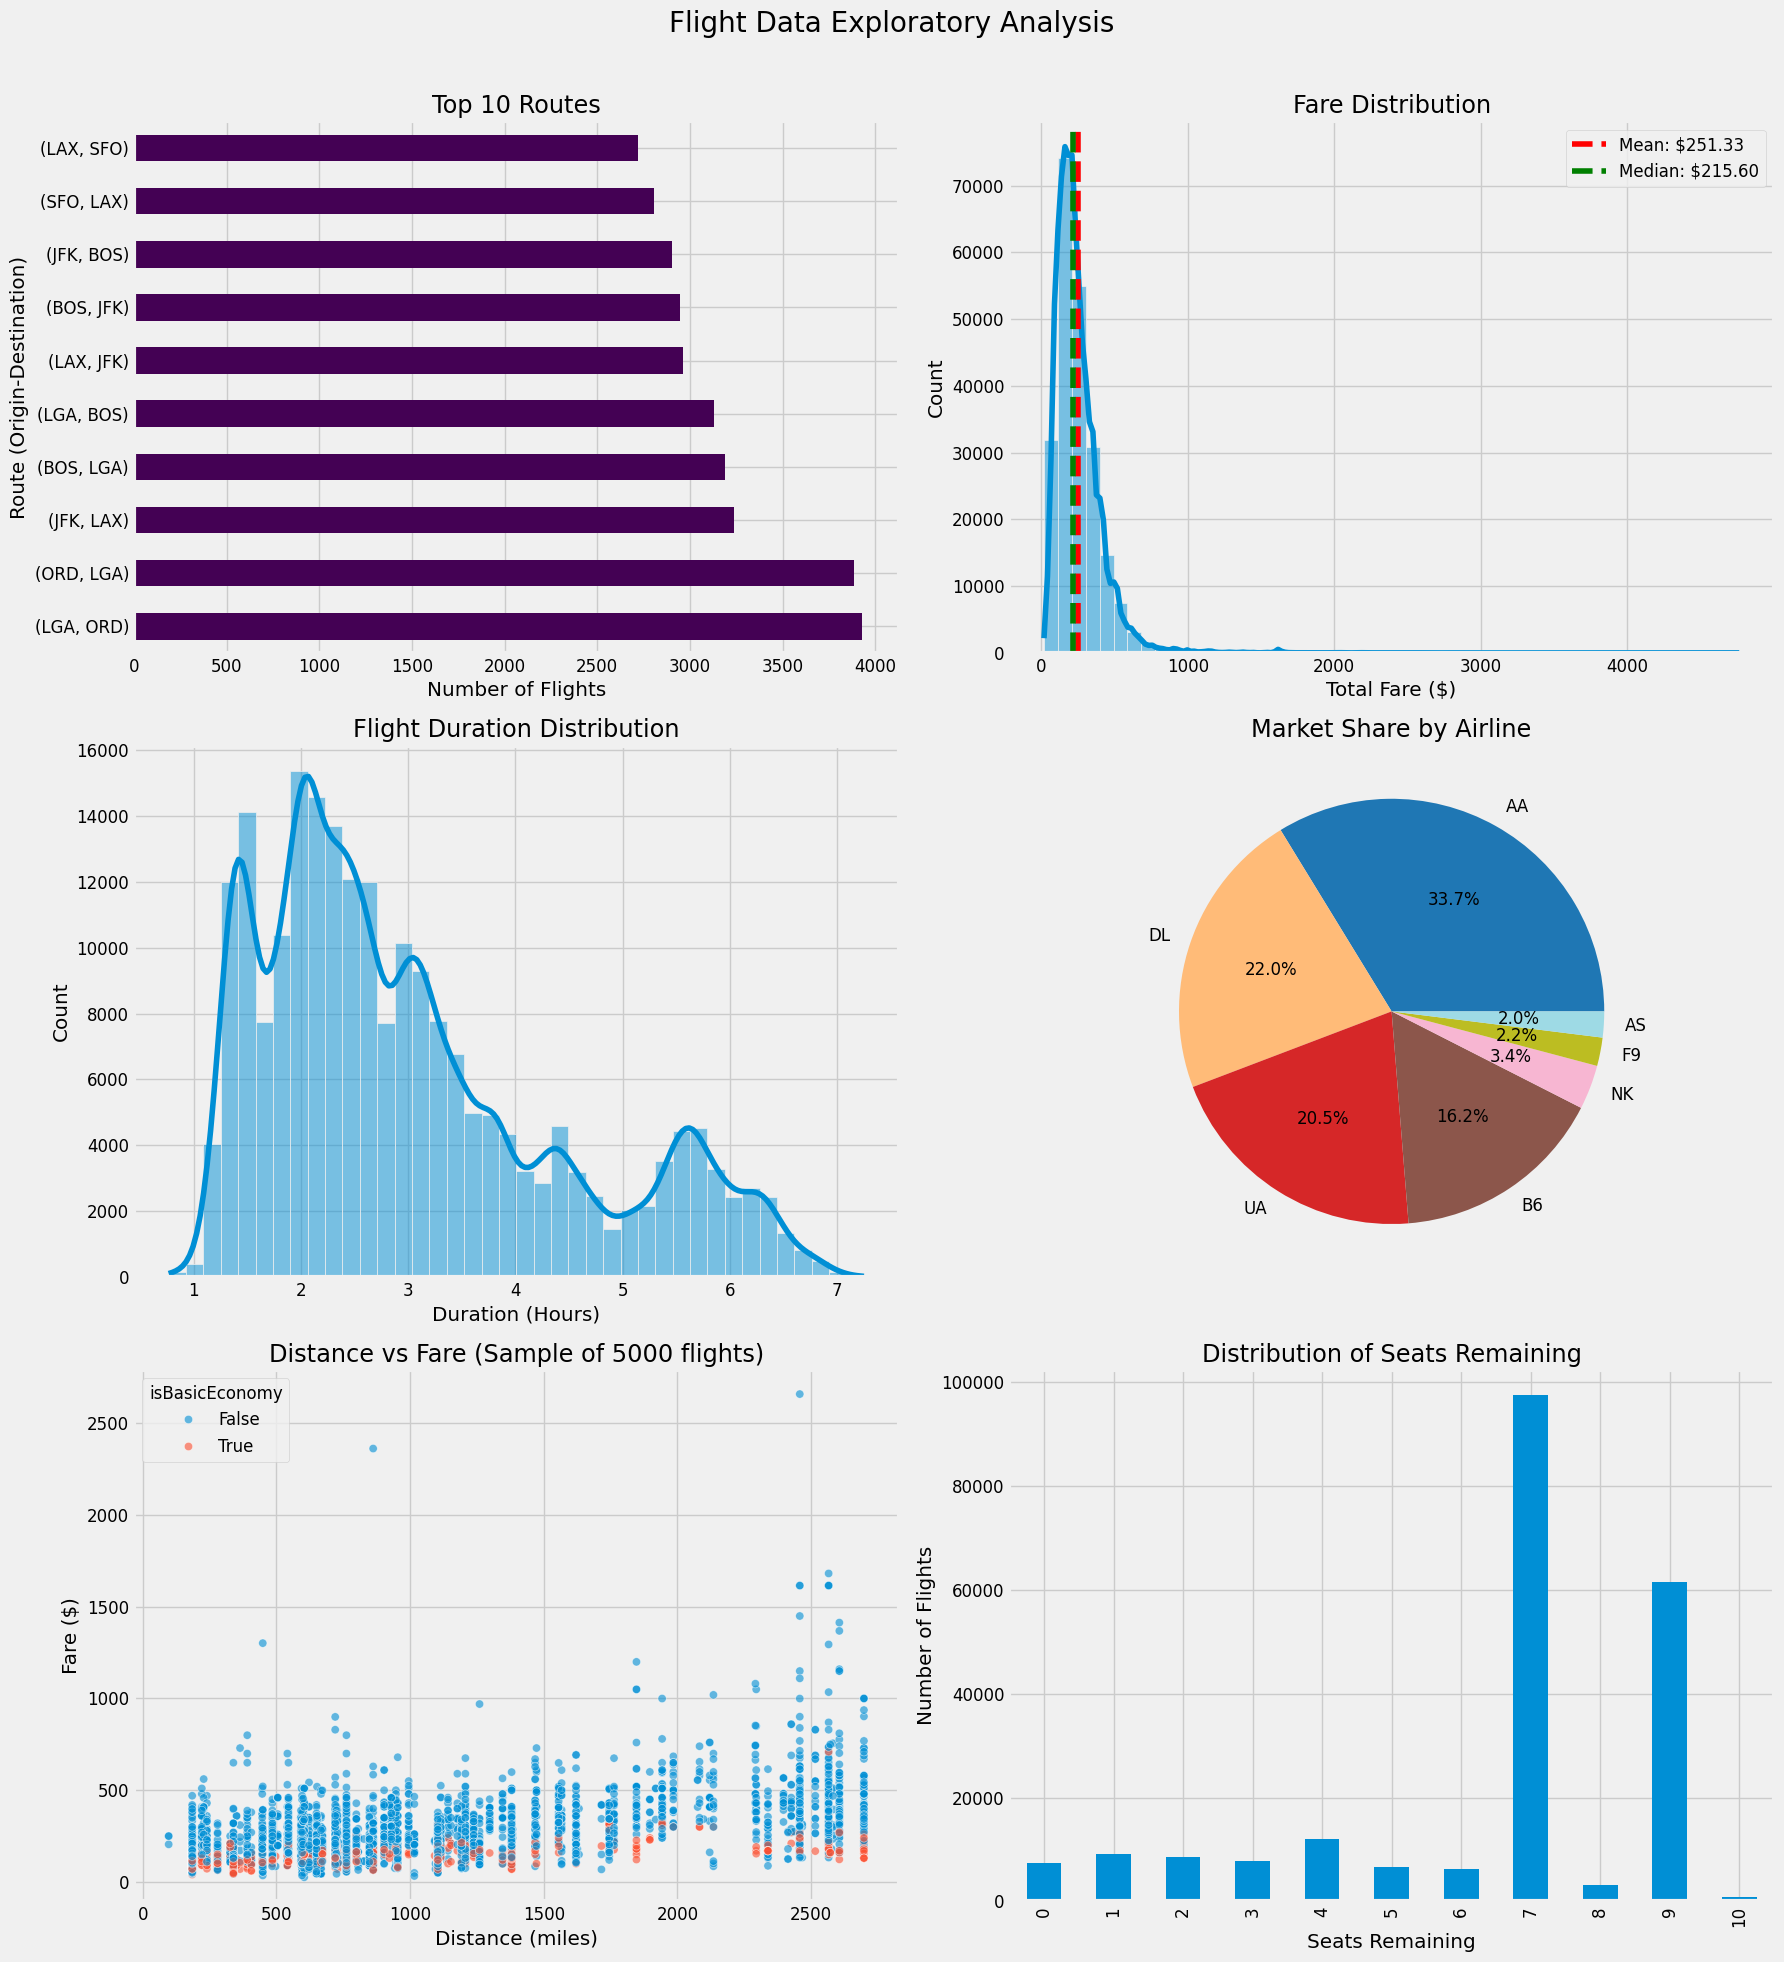

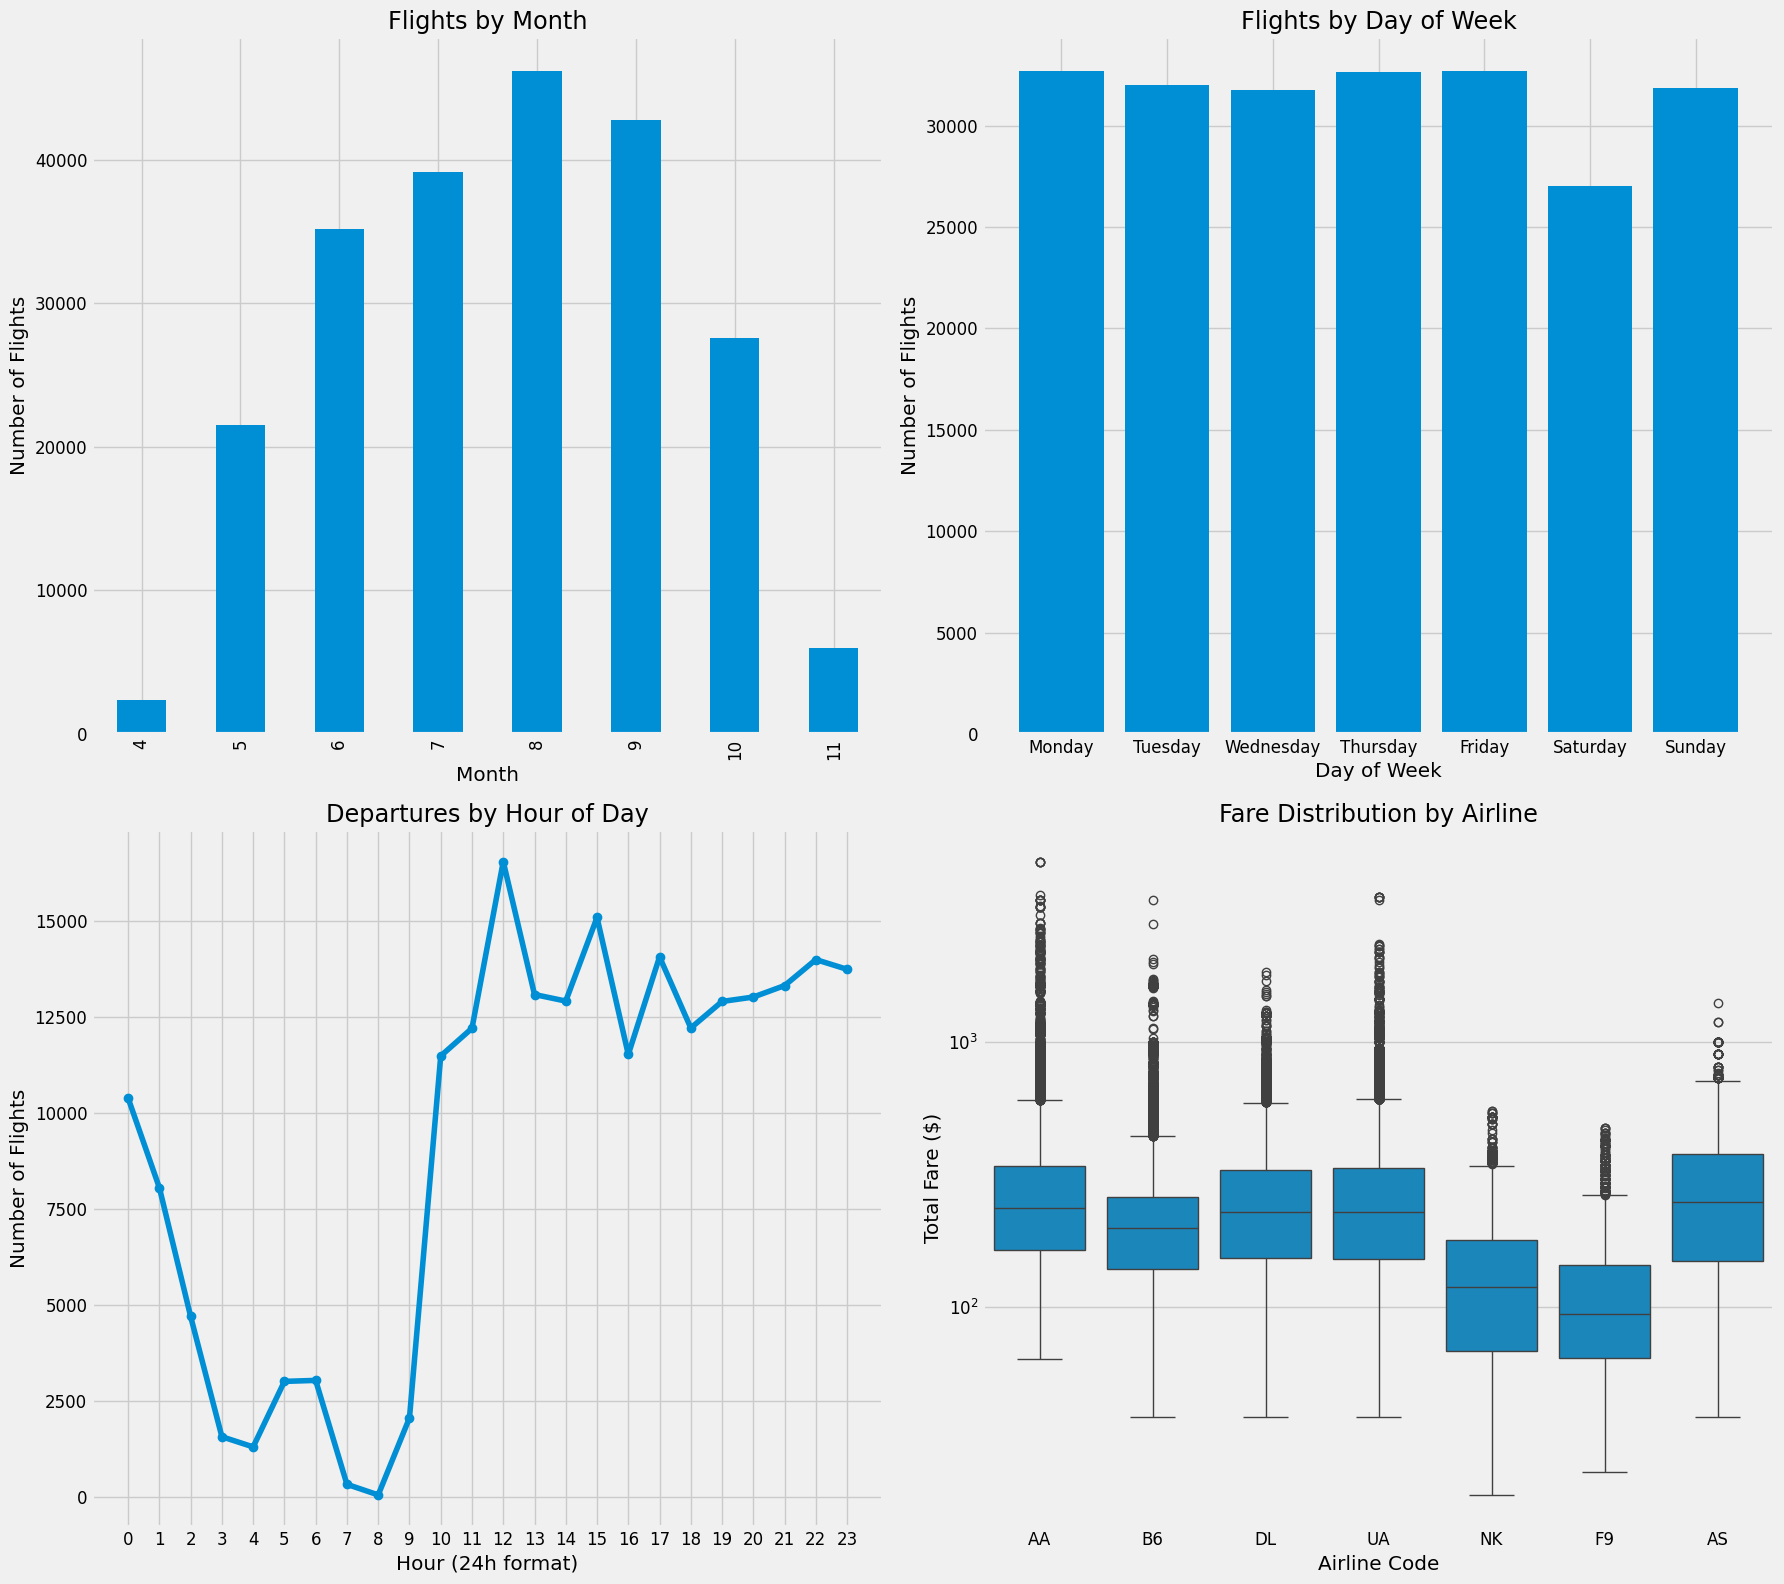

In [13]:
# Set up the figure style for better visualization
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 12

# Create subplots for different analyses
fig, axes = plt.subplots(3, 2, figsize=(18, 20))
fig.suptitle('Flight Data Exploratory Analysis', fontsize=20)

# 1. Top 10 routes (starting to destination)
routes = df.groupby(['startingAirport', 'destinationAirport']).size().sort_values(ascending=False).head(10)
routes.plot(kind='barh', ax=axes[0, 0], colormap='viridis')
axes[0, 0].set_title('Top 10 Routes')
axes[0, 0].set_xlabel('Number of Flights')
axes[0, 0].set_ylabel('Route (Origin-Destination)')

# 2. Price distribution
sns.histplot(df['totalFare'], bins=50, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Fare Distribution')
axes[0, 1].set_xlabel('Total Fare ($)')
axes[0, 1].axvline(df['totalFare'].mean(), color='r', linestyle='--', label=f'Mean: ${df["totalFare"].mean():.2f}')
axes[0, 1].axvline(df['totalFare'].median(), color='g', linestyle='--', label=f'Median: ${df["totalFare"].median():.2f}')
axes[0, 1].legend()

# 3. Flight Duration Distribution
sns.histplot(df['segmentsDurationInSeconds']/3600, bins=40, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Flight Duration Distribution')
axes[1, 0].set_xlabel('Duration (Hours)')

# 4. Airline Market Share
airline_counts = df['segmentsAirlineCode'].value_counts()
airline_counts.plot(kind='pie', autopct='%1.1f%%', ax=axes[1, 1], colormap='tab20')
axes[1, 1].set_title('Market Share by Airline')
axes[1, 1].set_ylabel('')

# 5. Flight distance vs fare
sns.scatterplot(x='totalTravelDistance', y='totalFare', data=df.sample(5000), alpha=0.6, hue='isBasicEconomy', ax=axes[2, 0])
axes[2, 0].set_title('Distance vs Fare (Sample of 5000 flights)')
axes[2, 0].set_xlabel('Distance (miles)')
axes[2, 0].set_ylabel('Fare ($)')

# 6. Seats remaining distribution
seats_data = df['seatsRemaining'].value_counts().sort_index()
seats_data.plot(kind='bar', ax=axes[2, 1])
axes[2, 1].set_title('Distribution of Seats Remaining')
axes[2, 1].set_xlabel('Seats Remaining')
axes[2, 1].set_ylabel('Number of Flights')


plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

# Create additional plots for temporal patterns
fig, axes = plt.subplots(2, 2, figsize=(18, 16))

# 1. Flight date distribution
df['flightDate'] = pd.to_datetime(df['flightDate'])
df['month'] = df['flightDate'].dt.month
df['day_of_week'] = df['flightDate'].dt.dayofweek
monthly_flights = df['month'].value_counts().sort_index()
monthly_flights.plot(kind='bar', ax=axes[0, 0])
axes[0, 0].set_title('Flights by Month')
axes[0, 0].set_xlabel('Month')
axes[0, 0].set_ylabel('Number of Flights')

# 2. Day of week distribution
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_counts = df['day_of_week'].value_counts().sort_index()
axes[0, 1].bar(day_names, day_counts.values)
axes[0, 1].set_title('Flights by Day of Week')
axes[0, 1].set_xlabel('Day of Week')
axes[0, 1].set_ylabel('Number of Flights')

# 3. Time of day distribution
df['departure_hour'] = df['segmentsDepartureTime'].dt.hour
hourly_departures = df['departure_hour'].value_counts().sort_index()
hourly_departures.plot(kind='line', marker='o', ax=axes[1, 0])
axes[1, 0].set_title('Departures by Hour of Day')
axes[1, 0].set_xlabel('Hour (24h format)')
axes[1, 0].set_ylabel('Number of Flights')
axes[1, 0].set_xticks(range(0, 24))

# 4. Price vs airline boxplot
sns.boxplot(x='segmentsAirlineCode', y='totalFare', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Fare Distribution by Airline')
axes[1, 1].set_xlabel('Airline Code')
axes[1, 1].set_ylabel('Total Fare ($)')
axes[1, 1].set_yscale('log')  # Using log scale to handle price outliers

plt.tight_layout()
plt.show()

# Factors influencing Fares

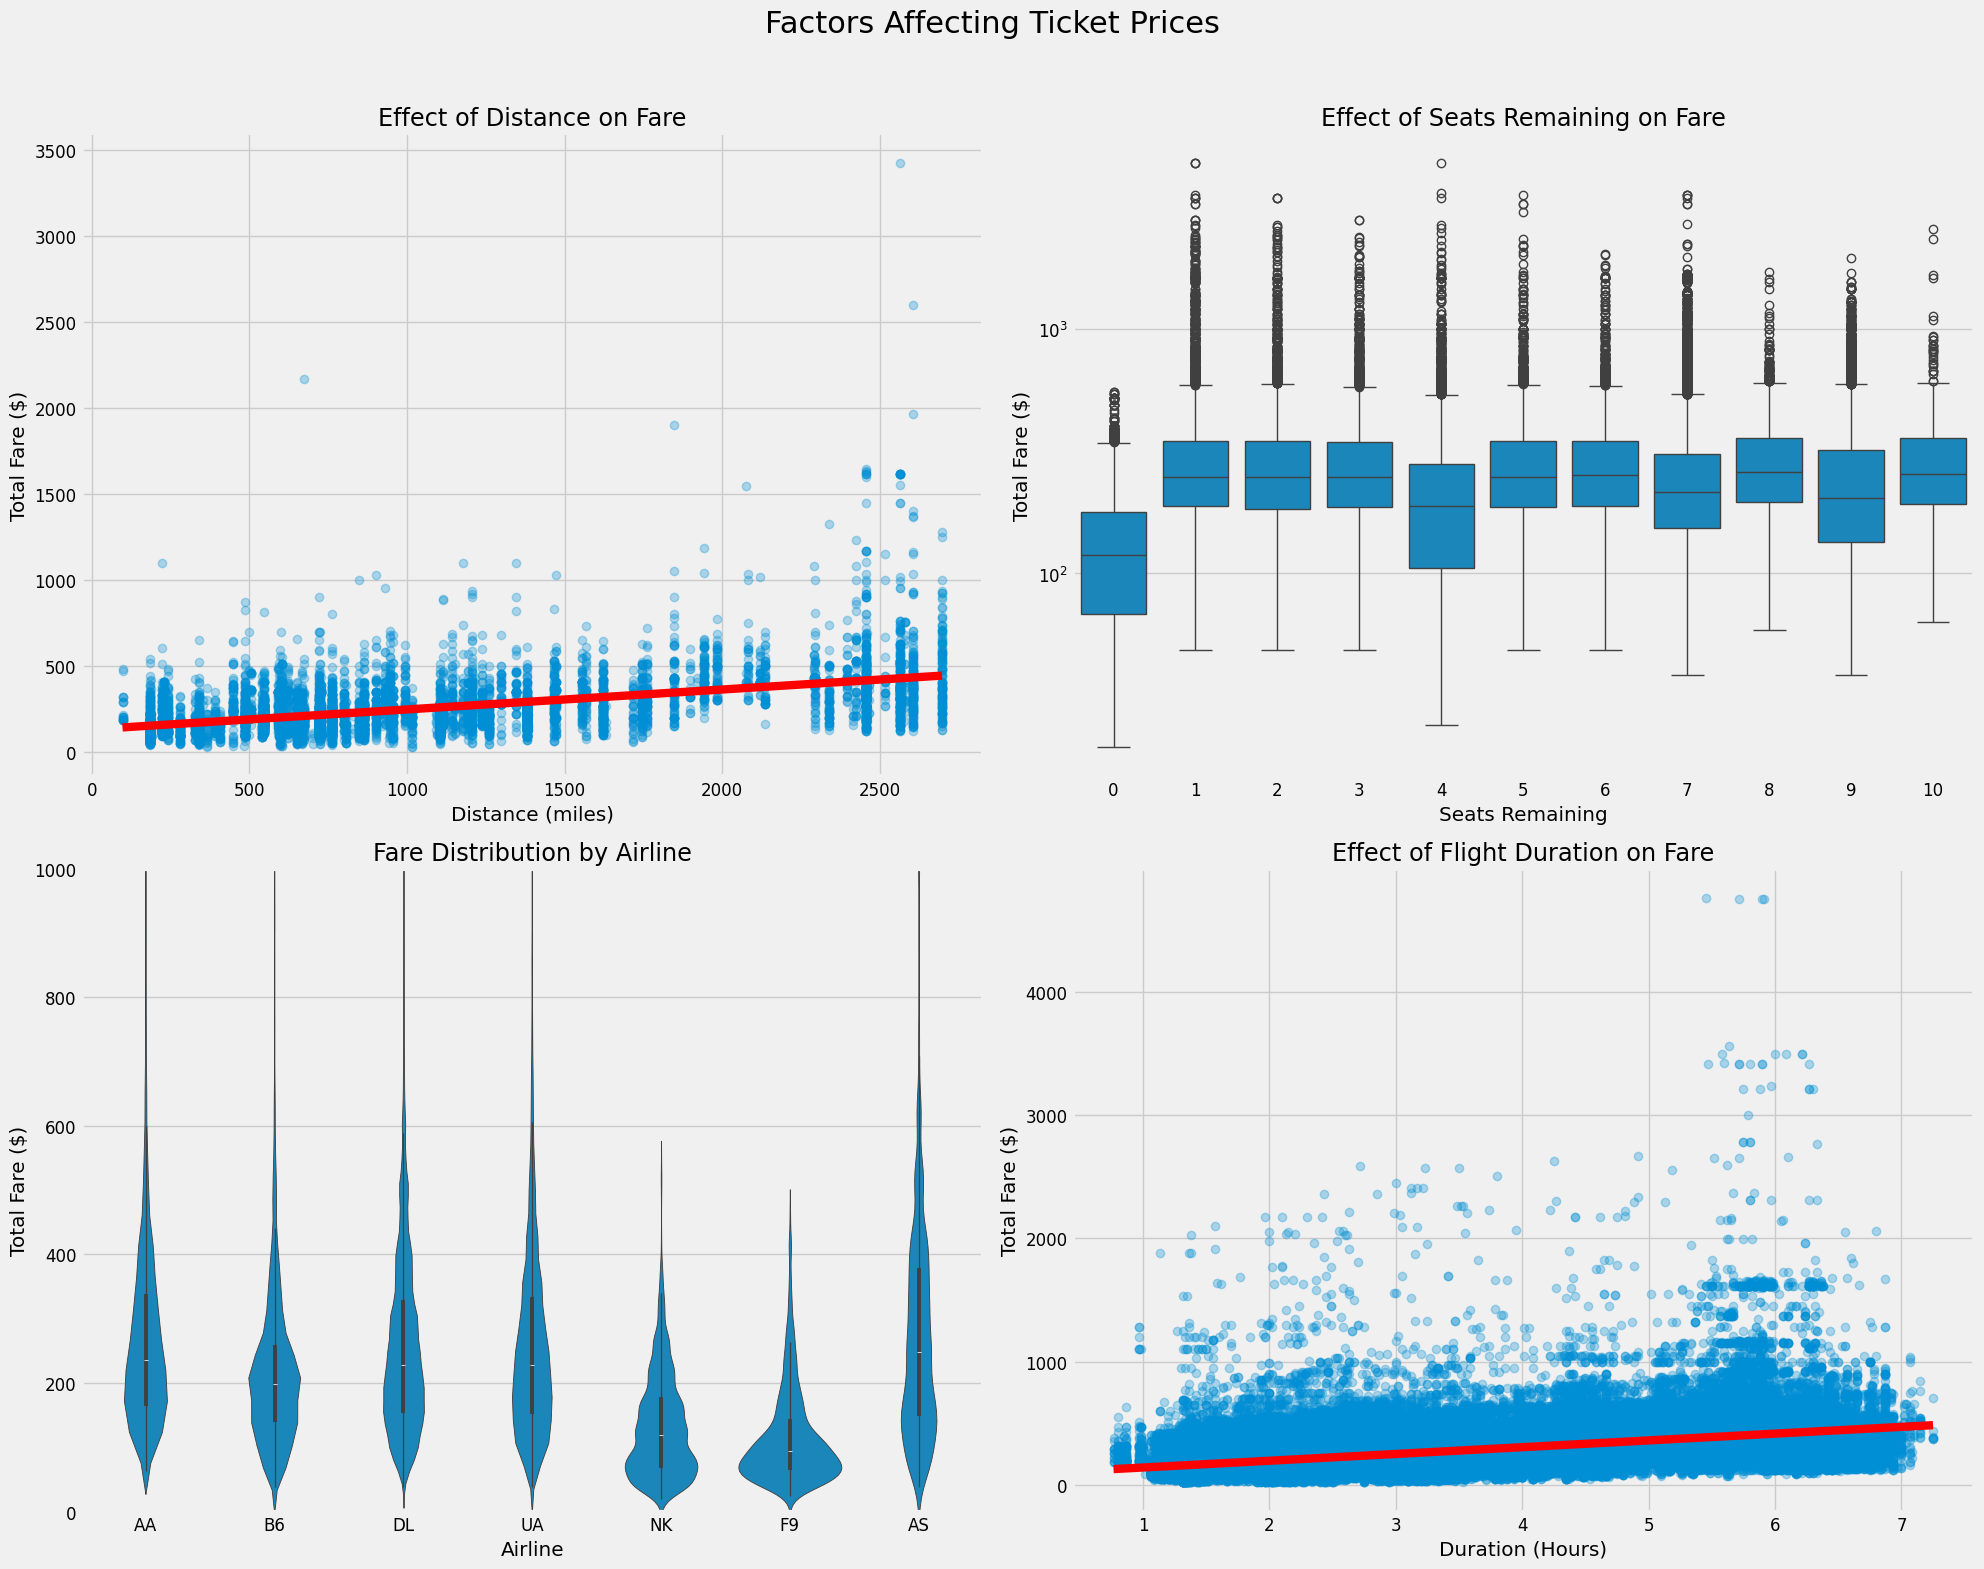

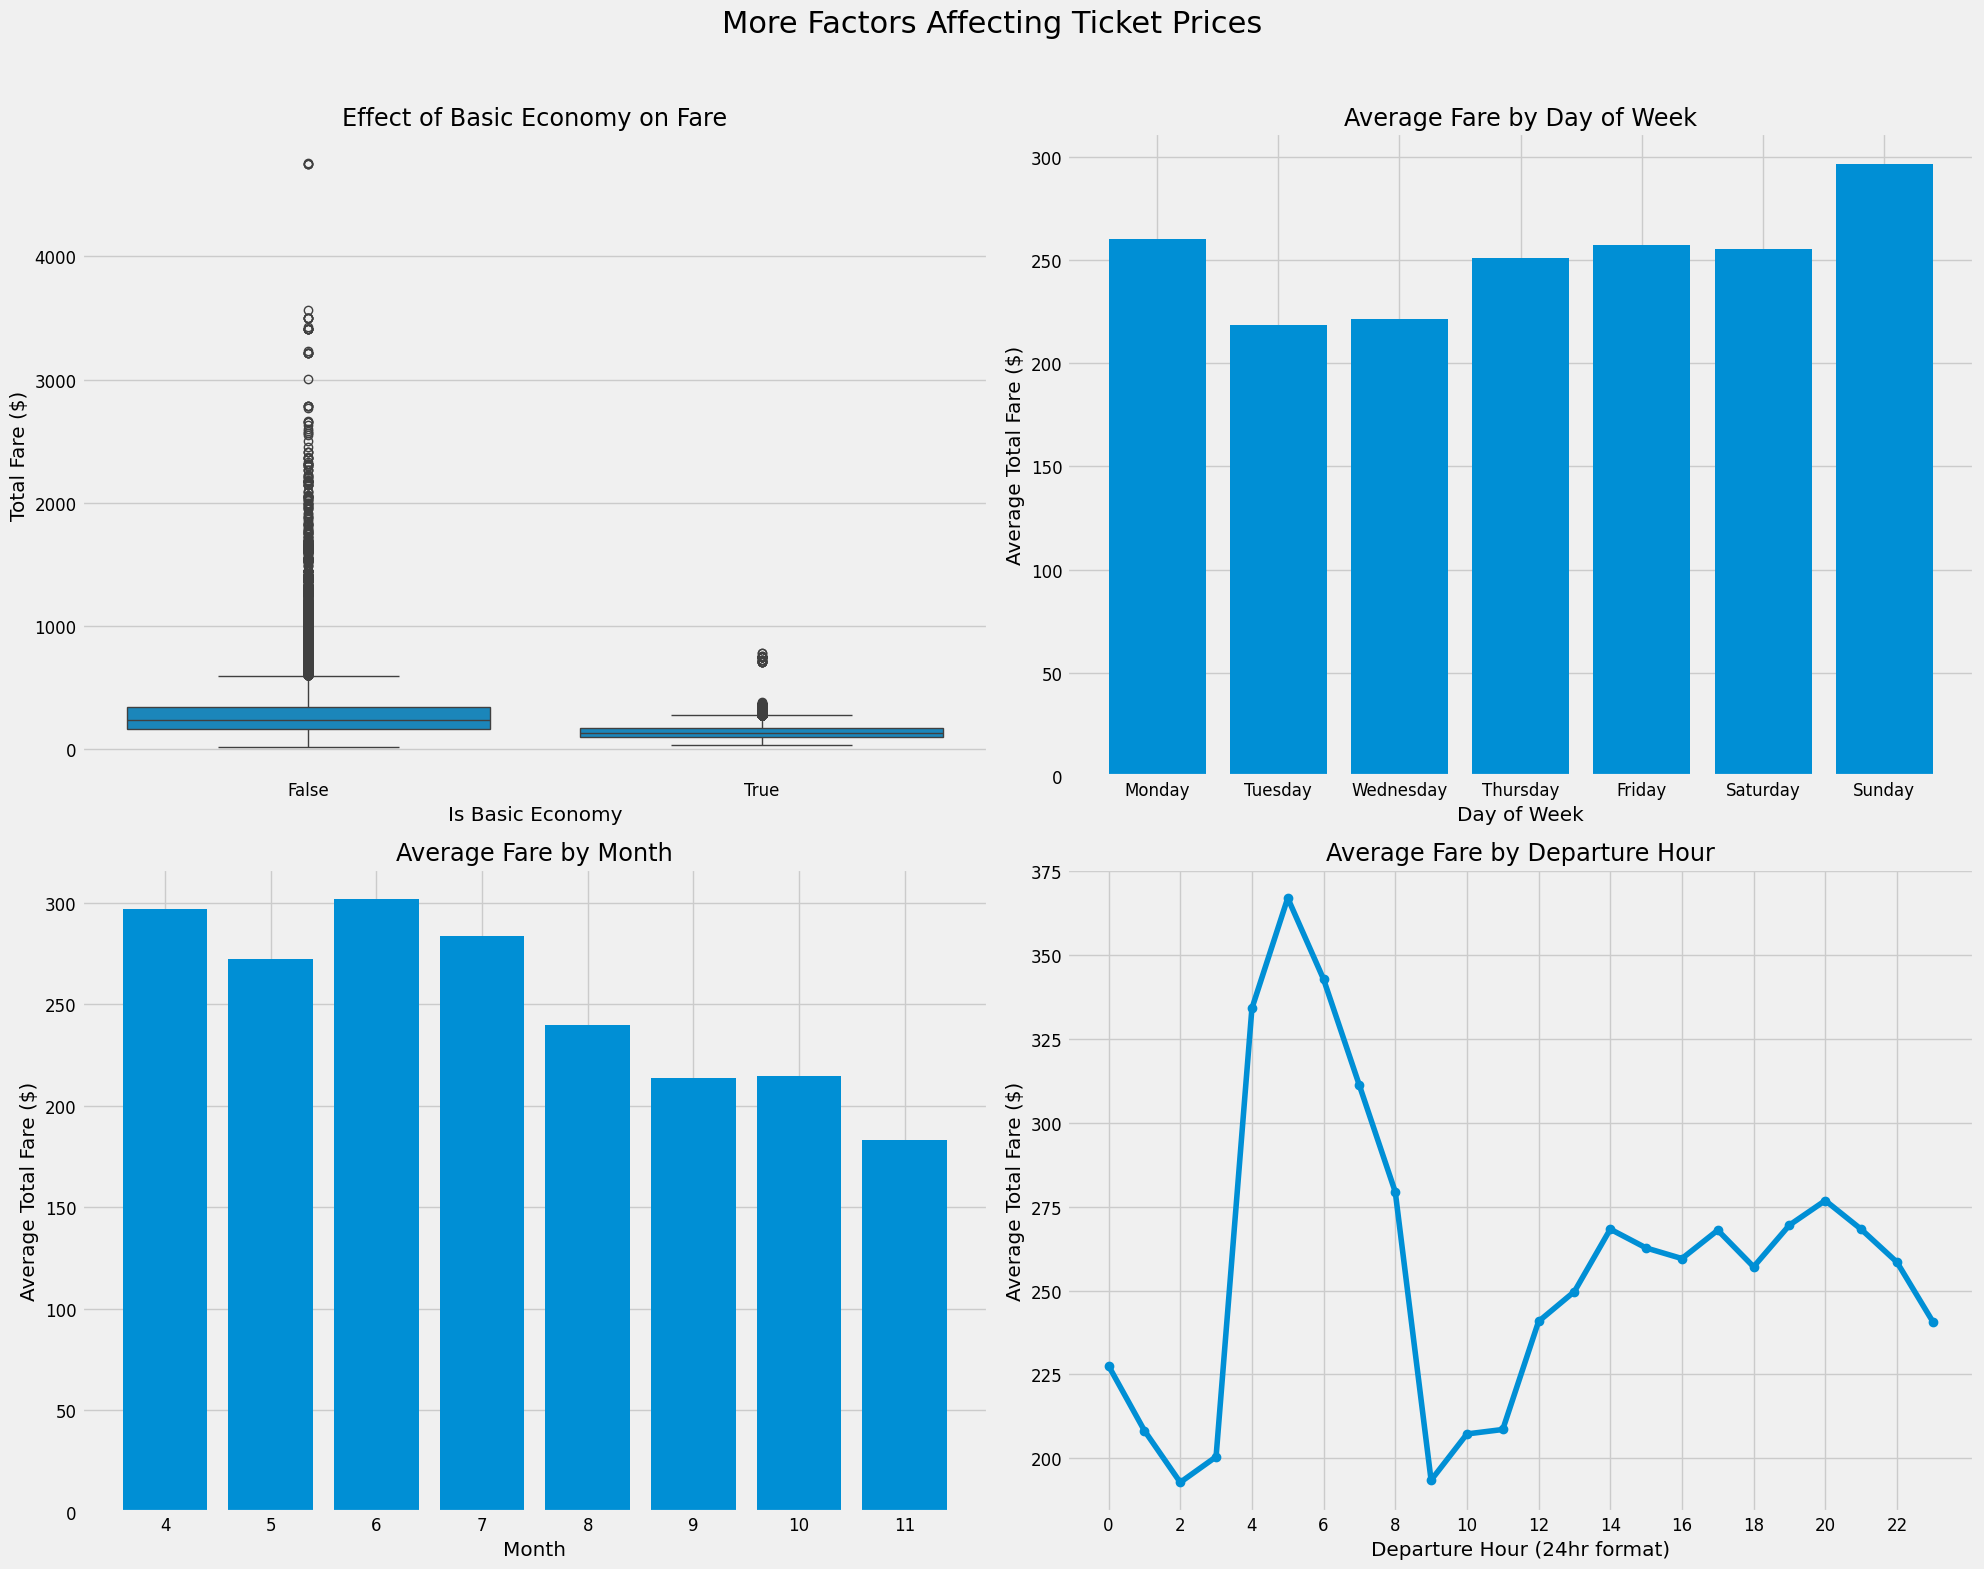

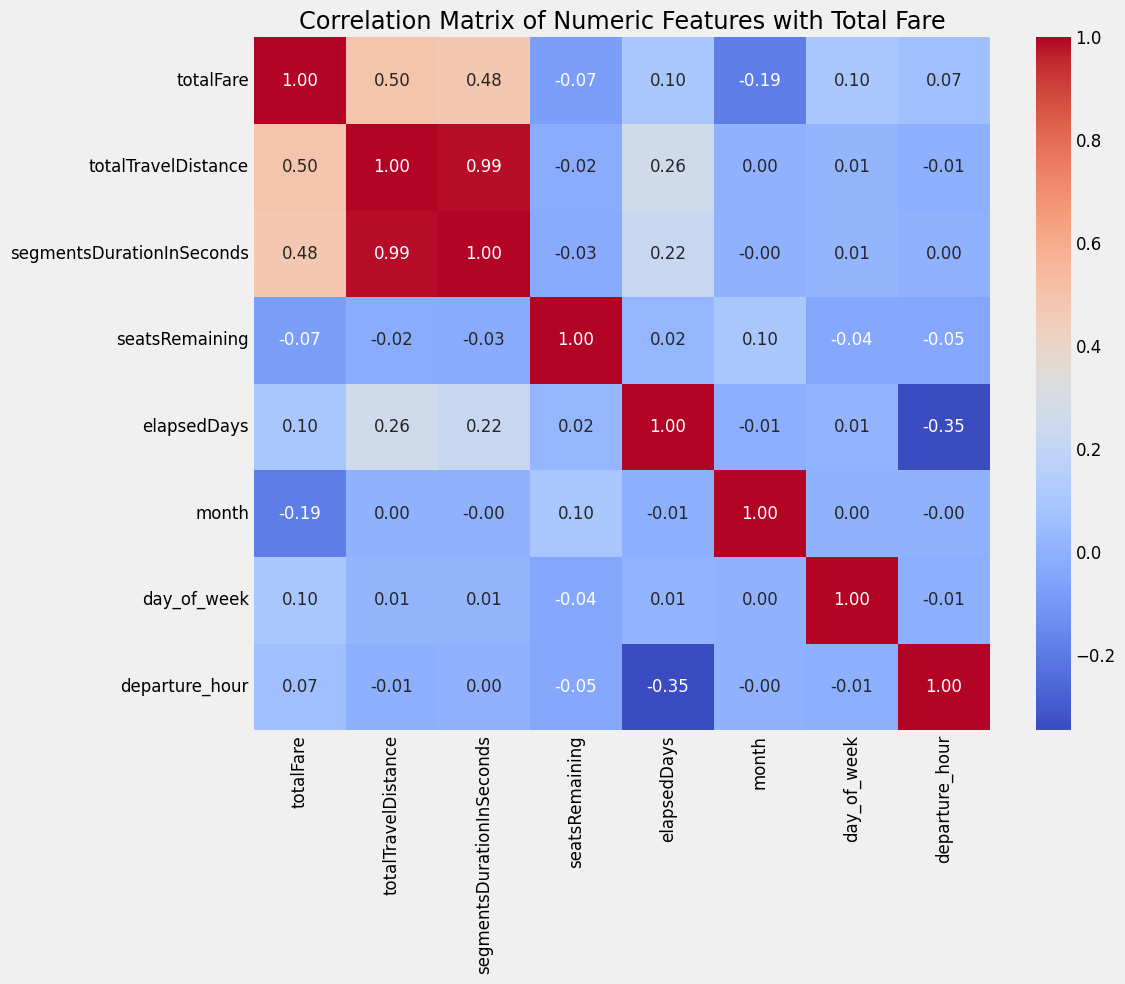

In [24]:
# Let's explore the effects of various features on totalFare

plt.figure(figsize=(20, 16))
plt.suptitle('Factors Affecting Ticket Prices', fontsize=22)

# 1. Distance vs Fare with regression line
plt.subplot(2, 2, 1)
sns.regplot(x='totalTravelDistance', y='totalFare', data=df.sample(10000), scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('Effect of Distance on Fare')
plt.xlabel('Distance (miles)')
plt.ylabel('Total Fare ($)')

# 2. Seats Remaining vs Fare
plt.subplot(2, 2, 2)
sns.boxplot(x='seatsRemaining', y='totalFare', data=df[df['seatsRemaining'] <= 10])
plt.title('Effect of Seats Remaining on Fare')
plt.xlabel('Seats Remaining')
plt.ylabel('Total Fare ($)')
plt.yscale('log')  # Using log scale to handle outliers

# 3. Airline vs Fare
plt.subplot(2, 2, 3)
sns.violinplot(x='segmentsAirlineCode', y='totalFare', data=df)
plt.title('Fare Distribution by Airline')
plt.xlabel('Airline')
plt.ylabel('Total Fare ($)')
plt.ylim(0, 1000)  # Limiting y-axis for better visualization

# 4. Flight Duration vs Fare with regression line
plt.subplot(2, 2, 4)
sns.regplot(x=df['segmentsDurationInSeconds']/3600, y='totalFare', data=df, 
            scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('Effect of Flight Duration on Fare')
plt.xlabel('Duration (Hours)')
plt.ylabel('Total Fare ($)')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Second figure for more analyses
plt.figure(figsize=(20, 16))
plt.suptitle('More Factors Affecting Ticket Prices', fontsize=22)

# 1. Basic Economy vs Regular Economy
plt.subplot(2, 2, 1)
sns.boxplot(x='isBasicEconomy', y='totalFare', data=df)
plt.title('Effect of Basic Economy on Fare')
plt.xlabel('Is Basic Economy')
plt.ylabel('Total Fare ($)')

# 2. Day of Week vs Fare
plt.subplot(2, 2, 2)
day_fare_avg = df.groupby('day_of_week')['totalFare'].mean().reindex(range(7))
plt.bar(day_names, day_fare_avg.values)
plt.title('Average Fare by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Total Fare ($)')

# 3. Month vs Fare
plt.subplot(2, 2, 3)
month_fare = df.groupby('month')['totalFare'].mean().sort_index()
plt.bar(month_fare.index, month_fare.values)
plt.title('Average Fare by Month')
plt.xlabel('Month')
plt.ylabel('Average Total Fare ($)')
plt.xticks(month_fare.index)

# 4. Departure Hour vs Fare
plt.subplot(2, 2, 4)
hour_fare = df.groupby('departure_hour')['totalFare'].mean()
plt.plot(hour_fare.index, hour_fare.values, marker='o')
plt.title('Average Fare by Departure Hour')
plt.xlabel('Departure Hour (24hr format)')
plt.ylabel('Average Total Fare ($)')
plt.xticks(range(0, 24, 2))
plt.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Let's analyze some correlations
# Make sure to handle any missing values in the dataset
correlation_cols = ['totalFare', 'totalTravelDistance', 'segmentsDurationInSeconds', 
                    'seatsRemaining', 'elapsedDays', 'month', 'day_of_week', 'departure_hour']
correlation_df = df[correlation_cols].copy().dropna()
correlation_matrix = correlation_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numeric Features with Total Fare')
plt.tight_layout()
plt.show()

# Average Daily Fare

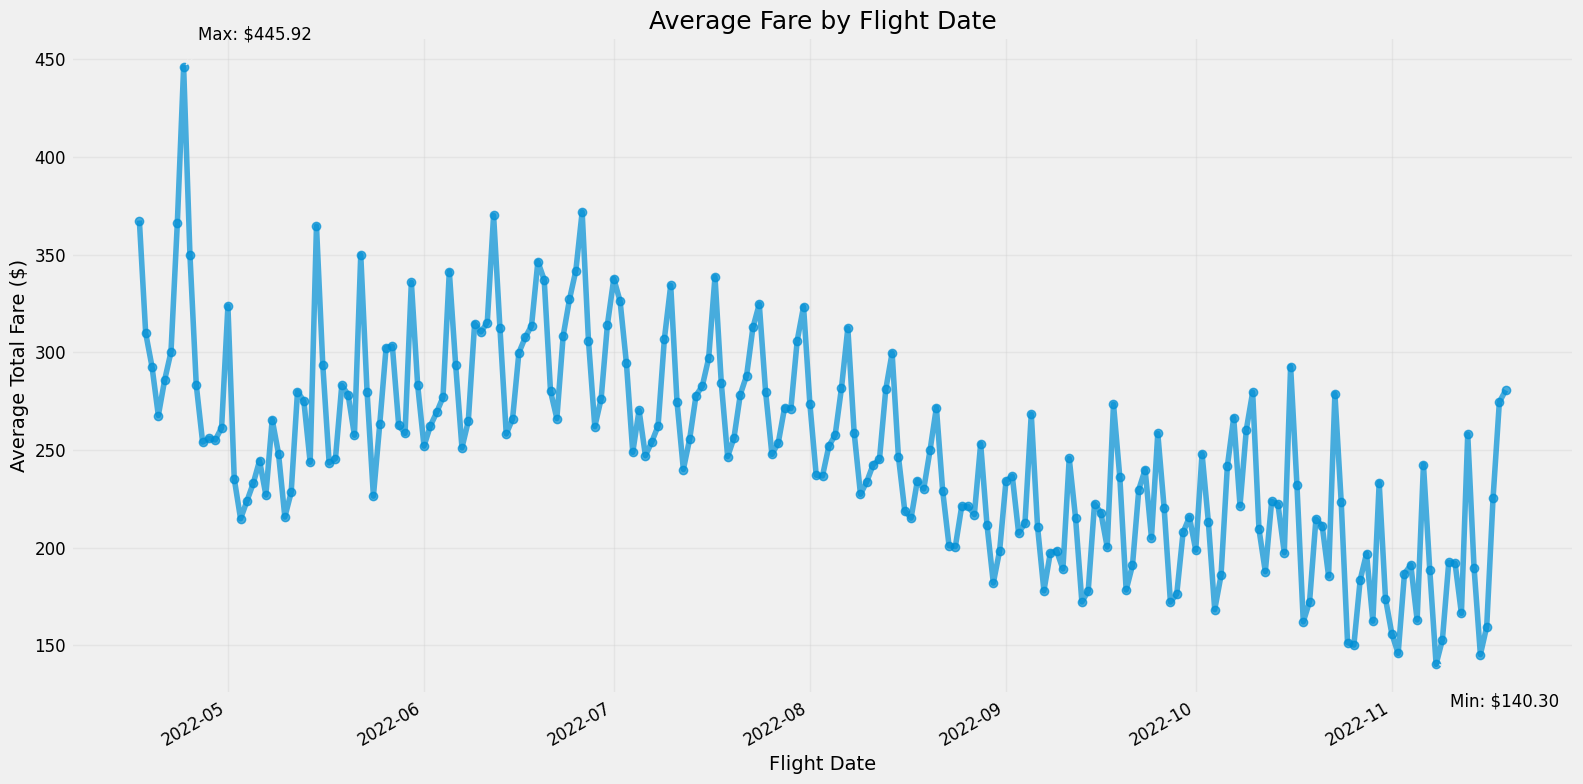

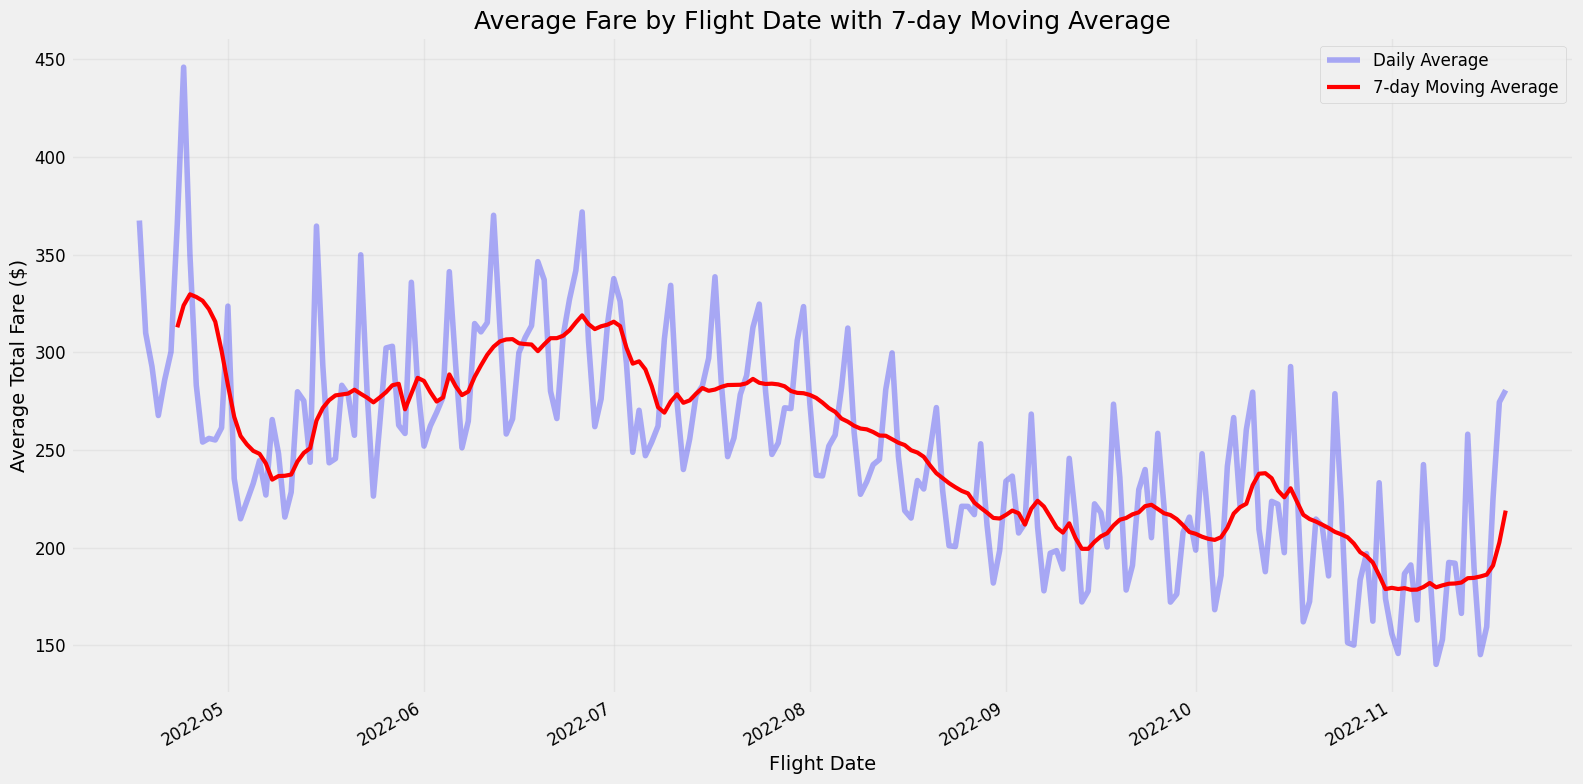

In [25]:
# Create a new DataFrame with average fare by flight date
date_fare = df.groupby('flightDate')['totalFare'].mean().reset_index()

# Sort the data by date
date_fare = date_fare.sort_values('flightDate')

# Create the plot
plt.figure(figsize=(16, 8))
plt.plot(date_fare['flightDate'], date_fare['totalFare'], marker='o', linestyle='-', alpha=0.7)
plt.title('Average Fare by Flight Date', fontsize=18)
plt.xlabel('Flight Date', fontsize=14)
plt.ylabel('Average Total Fare ($)', fontsize=14)
plt.grid(True, alpha=0.3)

# Annotate maximum and minimum values
max_fare_idx = date_fare['totalFare'].idxmax()
min_fare_idx = date_fare['totalFare'].idxmin()

plt.annotate(f"Max: ${date_fare['totalFare'].max():.2f}",
             xy=(date_fare.iloc[max_fare_idx]['flightDate'], date_fare.iloc[max_fare_idx]['totalFare']),
             xytext=(10, 20), textcoords='offset points',
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=.2'))

plt.annotate(f"Min: ${date_fare['totalFare'].min():.2f}",
             xy=(date_fare.iloc[min_fare_idx]['flightDate'], date_fare.iloc[min_fare_idx]['totalFare']),
             xytext=(10, -30), textcoords='offset points',
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=.2'))

# Improve x-axis date formatting
plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.show()

# Additionally, let's show a moving average to see the trend more clearly
plt.figure(figsize=(16, 8))
plt.plot(date_fare['flightDate'], date_fare['totalFare'], alpha=0.3, color='blue', label='Daily Average')

# Calculate and plot 7-day moving average
date_fare['7_day_ma'] = date_fare['totalFare'].rolling(window=7).mean()
plt.plot(date_fare['flightDate'], date_fare['7_day_ma'], linewidth=3, color='red', label='7-day Moving Average')

plt.title('Average Fare by Flight Date with 7-day Moving Average', fontsize=18)
plt.xlabel('Flight Date', fontsize=14)
plt.ylabel('Average Total Fare ($)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12)

# Improve x-axis date formatting
plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.show()

## Average Daily Fare by Routes

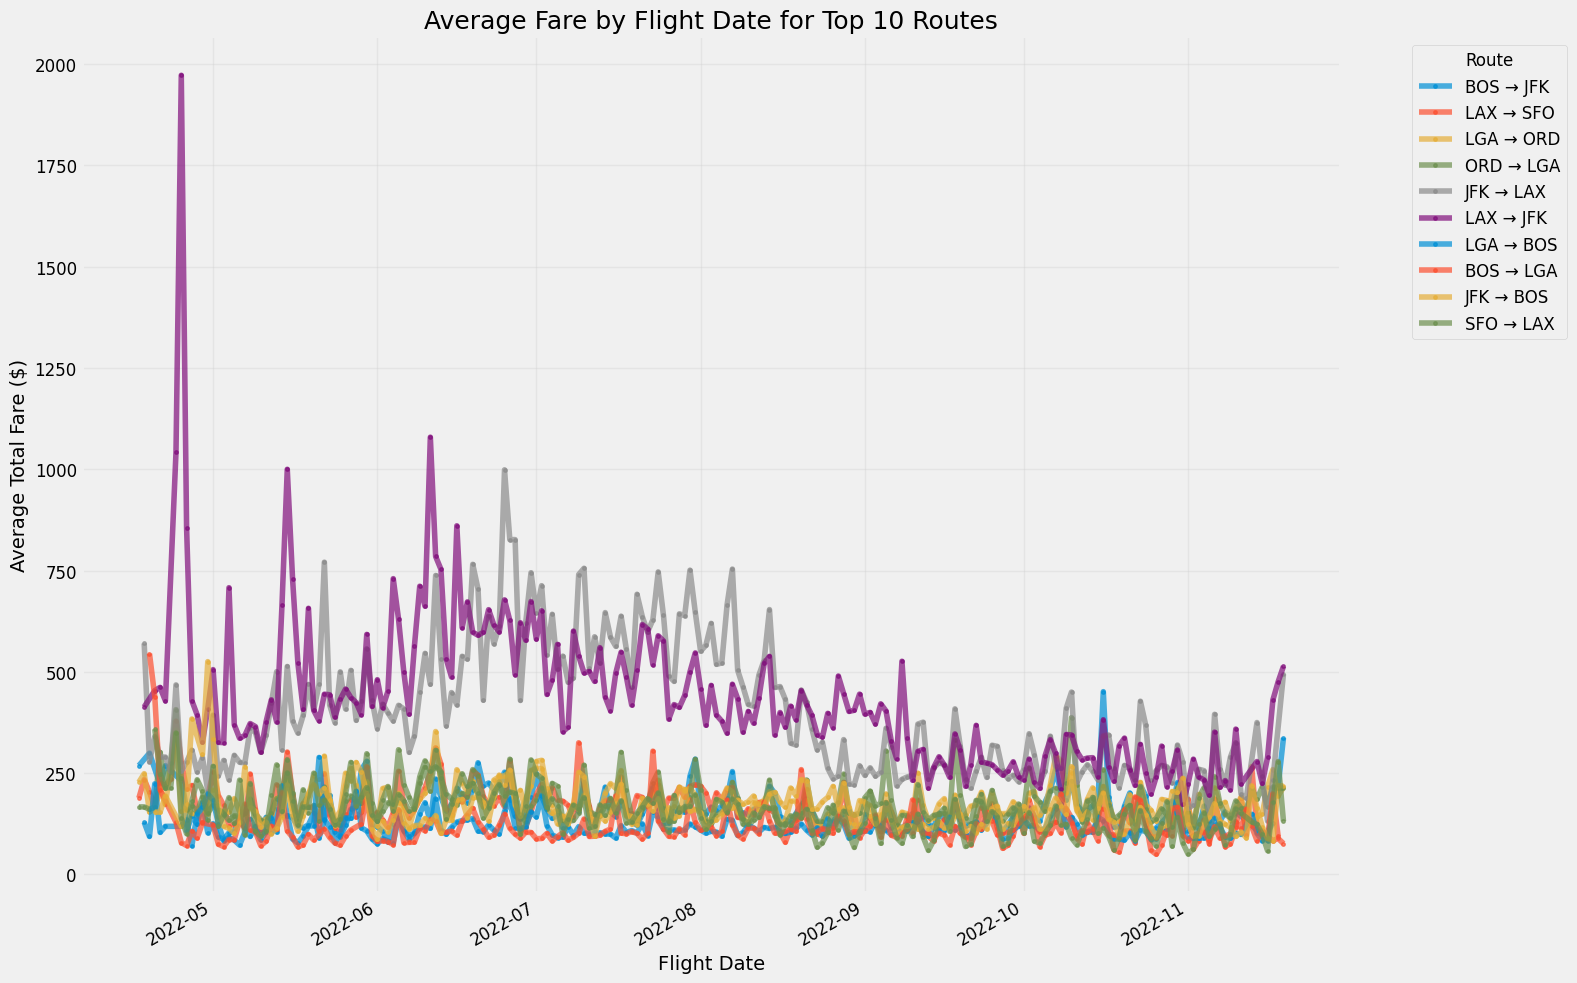

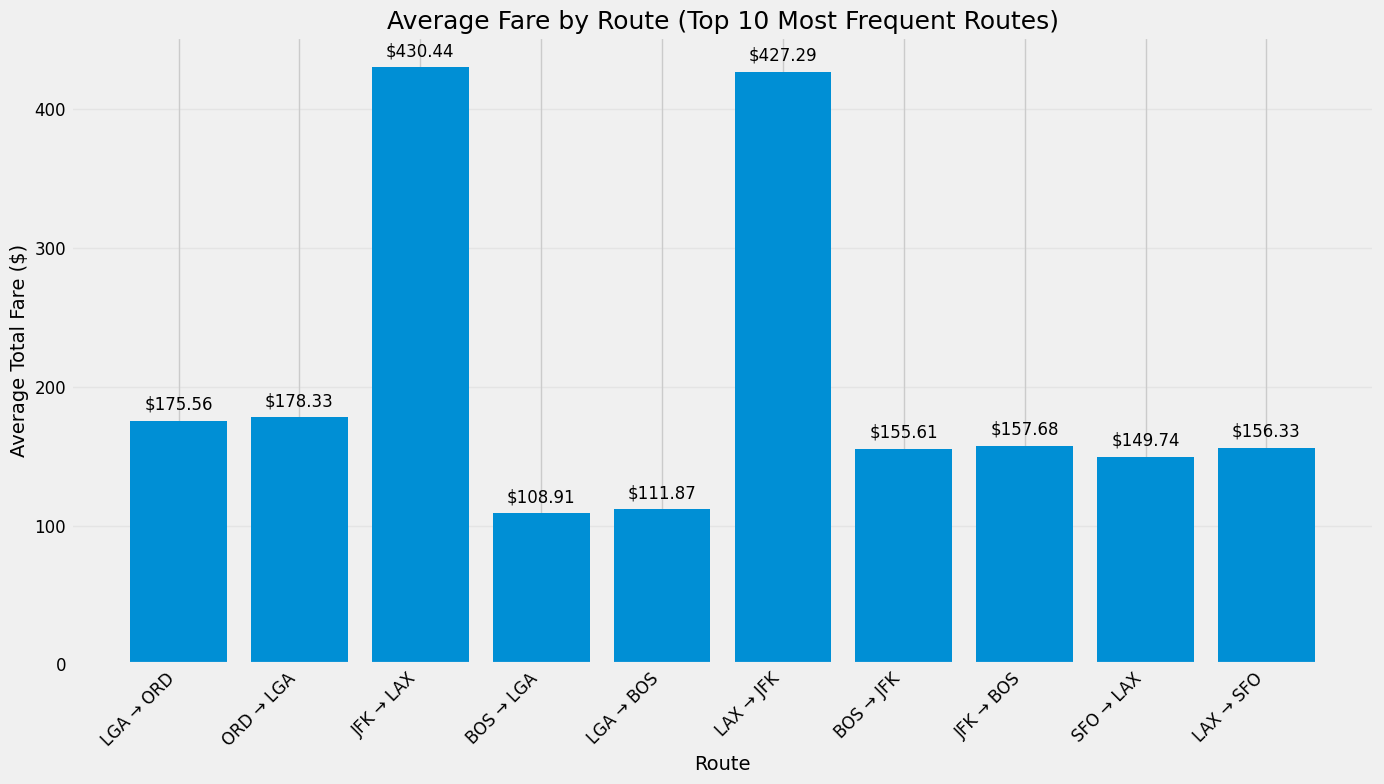

In [26]:
# Identify the top 10 most frequent routes
top_routes = df.groupby(['startingAirport', 'destinationAirport']).size().sort_values(ascending=False).head(10)
top_routes_list = list(top_routes.index)

# Create a new DataFrame with average fare by flight date and route
route_date_fare = df[df.set_index(['startingAirport', 'destinationAirport']).index.isin(top_routes_list)]
route_date_fare = route_date_fare.groupby(['flightDate', 'startingAirport', 'destinationAirport'])['totalFare'].mean().reset_index()

# Create the plot
plt.figure(figsize=(16, 10))

# Create a route label for better readability
route_date_fare['route'] = route_date_fare['startingAirport'] + ' → ' + route_date_fare['destinationAirport']

# Plot each route
for route in route_date_fare['route'].unique():
    route_data = route_date_fare[route_date_fare['route'] == route]
    plt.plot(route_data['flightDate'], route_data['totalFare'], label=route, marker='.', markersize=5, alpha=0.7)

plt.title('Average Fare by Flight Date for Top 10 Routes', fontsize=18)
plt.xlabel('Flight Date', fontsize=14)
plt.ylabel('Average Total Fare ($)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend(title='Route', bbox_to_anchor=(1.05, 1), loc='upper left')

# Improve x-axis date formatting
plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.show()

# Additionally, let's show a summary of average fares for each route
route_summary = df[df.set_index(['startingAirport', 'destinationAirport']).index.isin(top_routes_list)]
route_summary = route_summary.groupby(['startingAirport', 'destinationAirport'])['totalFare'].agg(['mean', 'min', 'max', 'count']).reset_index()
route_summary['route'] = route_summary['startingAirport'] + ' → ' + route_summary['destinationAirport']
route_summary = route_summary.sort_values('count', ascending=False)

# Plot the average fare for each route with a bar chart
plt.figure(figsize=(14, 8))
bars = plt.bar(route_summary['route'], route_summary['mean'])

# Add data labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 5,
             f'${height:.2f}', ha='center', va='bottom', rotation=0)

plt.title('Average Fare by Route (Top 10 Most Frequent Routes)', fontsize=18)
plt.xlabel('Route', fontsize=14)
plt.ylabel('Average Total Fare ($)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

<Figure size 2000x1500 with 0 Axes>

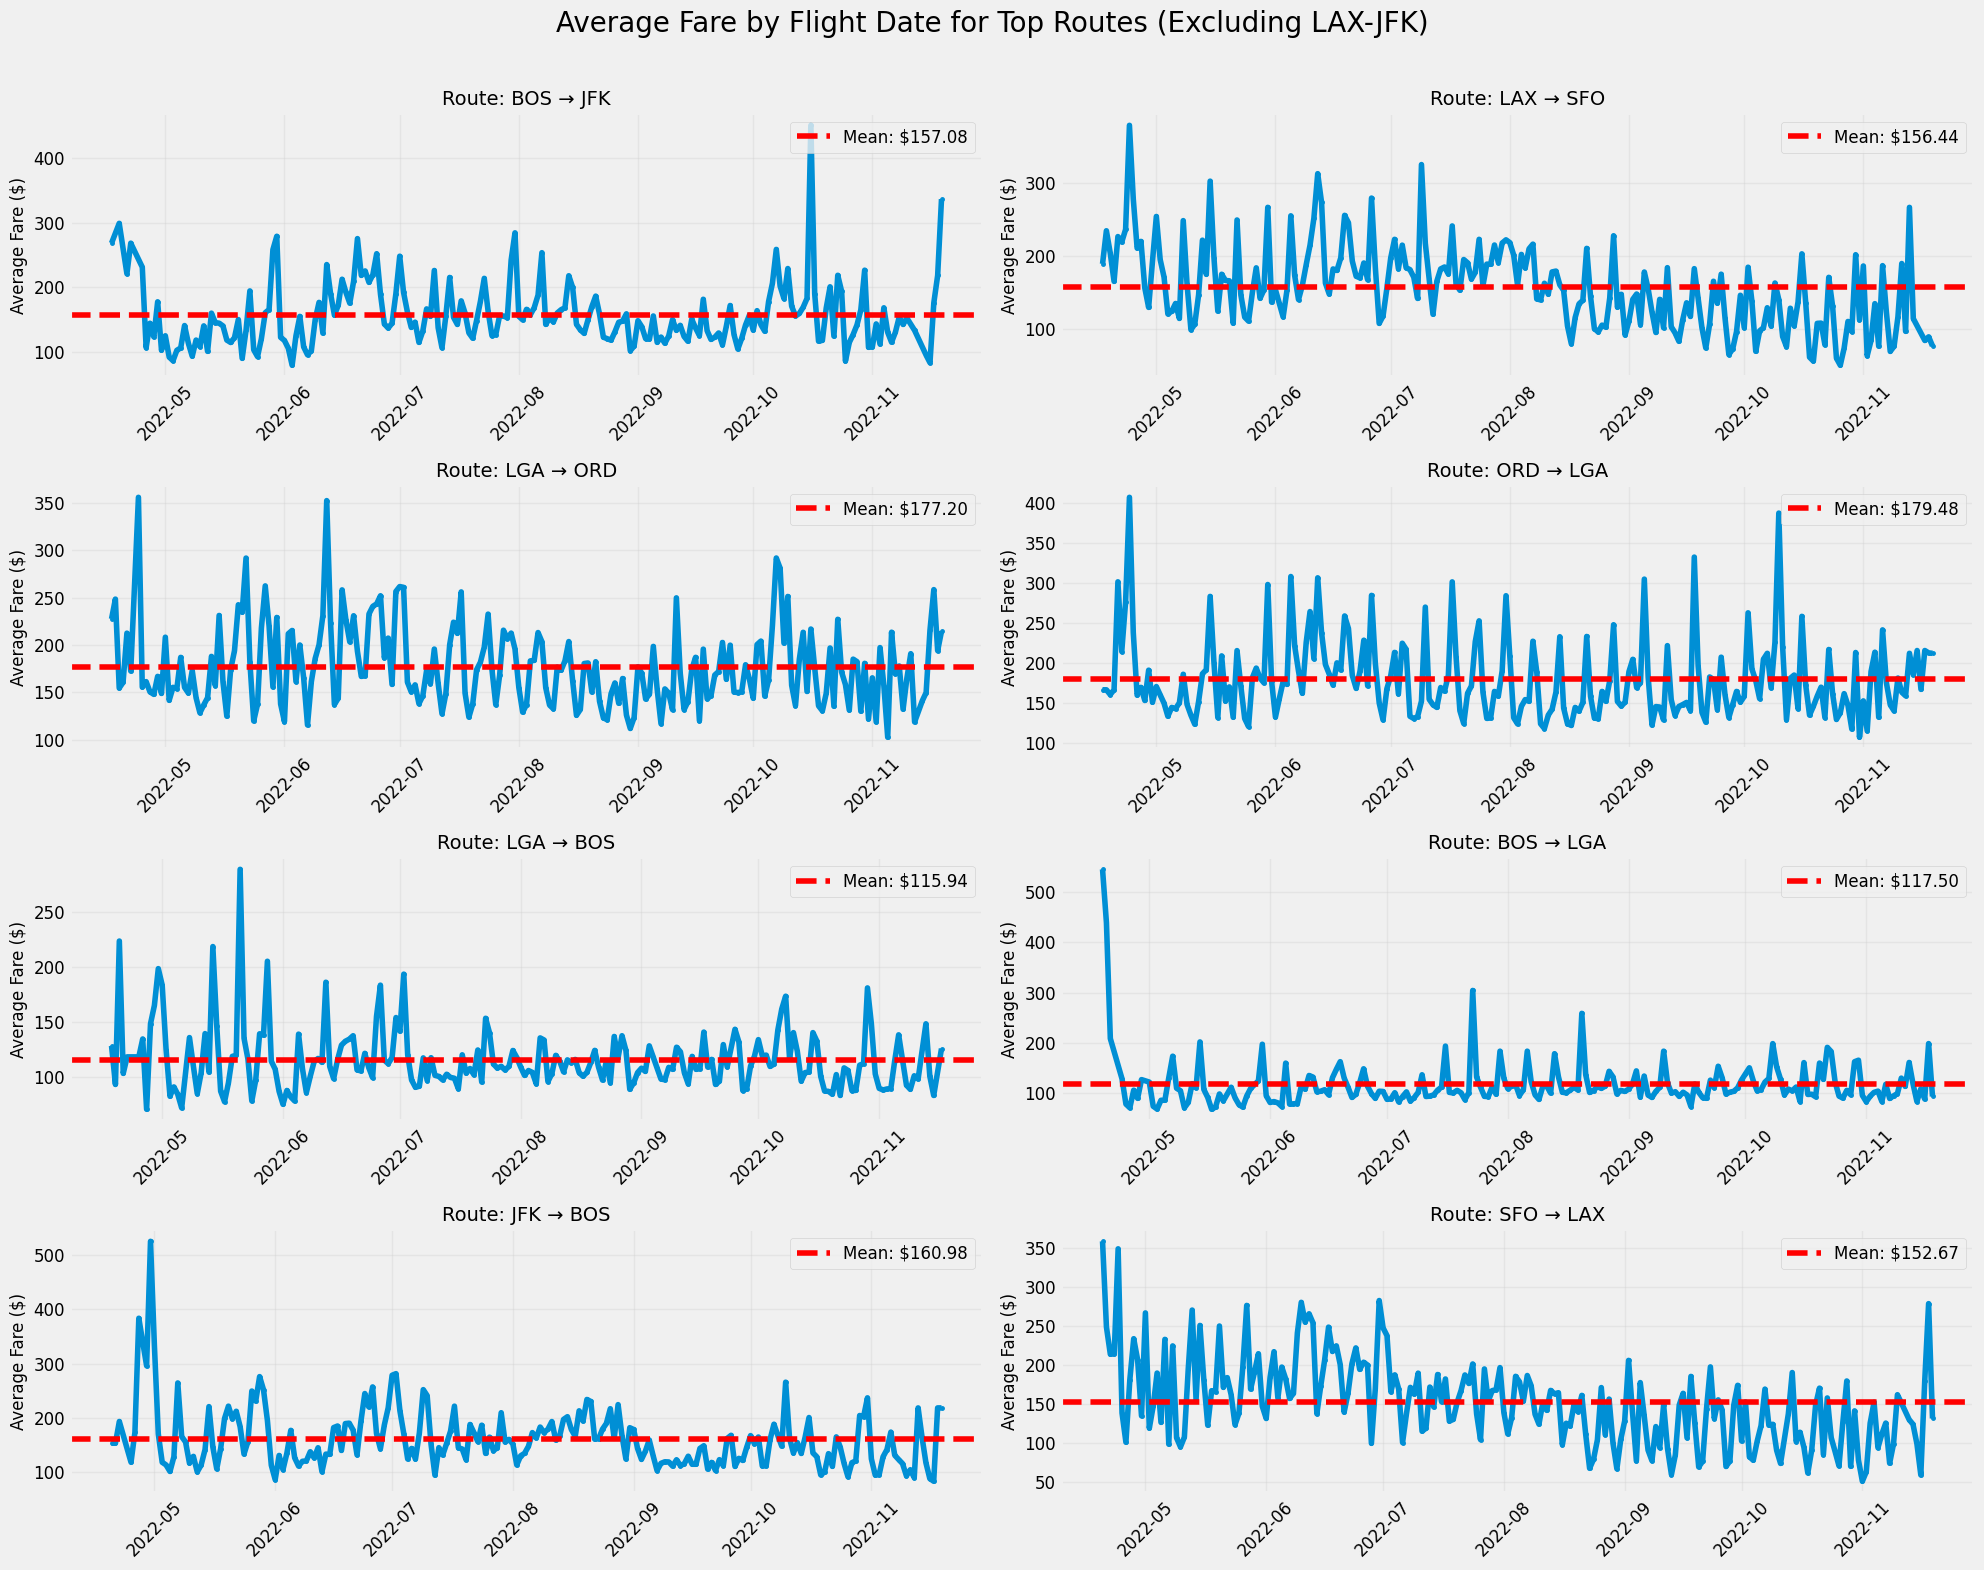

In [29]:
# Create the plot with subplots - one plot for each route
plt.figure(figsize=(20, 15))
unique_routes = route_date_fare['route'].unique()

# Filter out LAX-JFK routes
filtered_routes = [route for route in unique_routes if not ("LAX" in route and "JFK" in route)]

# Calculate rows and columns for subplots grid
n_routes = len(filtered_routes)
n_cols = 2
n_rows = (n_routes + 1) // 2  # Ceiling division

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 4*n_rows))
axes = axes.flatten()  # Flatten the axes array for easy indexing

# Plot each route on its own subplot
for i, route in enumerate(filtered_routes):
    route_data = route_date_fare[route_date_fare['route'] == route]
    axes[i].plot(route_data['flightDate'], route_data['totalFare'], marker='.', markersize=5)
    
    # Set subplot title and labels
    axes[i].set_title(f'Route: {route}', fontsize=14)
    axes[i].set_ylabel('Average Fare ($)', fontsize=12)
    axes[i].grid(True, alpha=0.3)
    
    # Format x-axis dates
    axes[i].tick_params(axis='x', rotation=45)
    
    # Add mean fare line
    mean_fare = route_data['totalFare'].mean()
    axes[i].axhline(y=mean_fare, color='r', linestyle='--', 
                   label=f'Mean: ${mean_fare:.2f}')
    axes[i].legend(loc='upper right')

# Hide unused subplots
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.suptitle('Average Fare by Flight Date for Top Routes (Excluding LAX-JFK)', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

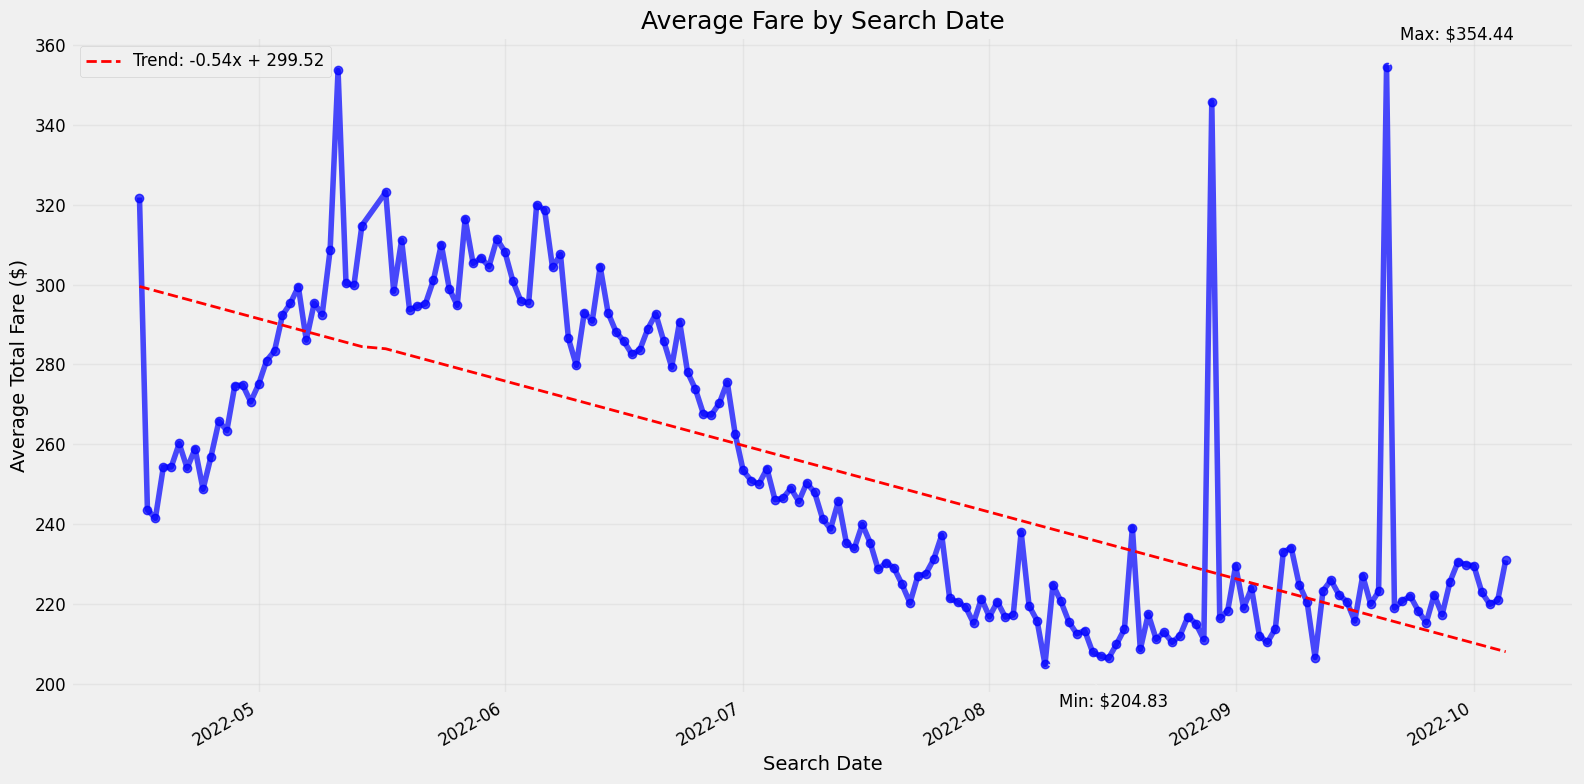

In [30]:
# Create a new DataFrame with average fare by search date
search_date_fare = df.groupby('searchDate')['totalFare'].mean().reset_index()

# Convert searchDate to datetime for proper plotting
search_date_fare['searchDate'] = pd.to_datetime(search_date_fare['searchDate'])

# Sort the data by date
search_date_fare = search_date_fare.sort_values('searchDate')

# Create the plot
plt.figure(figsize=(16, 8))
plt.plot(search_date_fare['searchDate'], search_date_fare['totalFare'], marker='o', linestyle='-', color='blue', alpha=0.7)
plt.title('Average Fare by Search Date', fontsize=18)
plt.xlabel('Search Date', fontsize=14)
plt.ylabel('Average Total Fare ($)', fontsize=14)
plt.grid(True, alpha=0.3)

# Annotate maximum and minimum values
max_fare_idx = search_date_fare['totalFare'].idxmax()
min_fare_idx = search_date_fare['totalFare'].idxmin()

plt.annotate(f"Max: ${search_date_fare['totalFare'].max():.2f}",
             xy=(search_date_fare.iloc[max_fare_idx]['searchDate'], search_date_fare.iloc[max_fare_idx]['totalFare']),
             xytext=(10, 20), textcoords='offset points',
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=.2'))

plt.annotate(f"Min: ${search_date_fare['totalFare'].min():.2f}",
             xy=(search_date_fare.iloc[min_fare_idx]['searchDate'], search_date_fare.iloc[min_fare_idx]['totalFare']),
             xytext=(10, -30), textcoords='offset points',
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=.2'))

# Calculate and plot trend line
z = np.polyfit(range(len(search_date_fare)), search_date_fare['totalFare'], 1)
p = np.poly1d(z)
plt.plot(search_date_fare['searchDate'], p(range(len(search_date_fare))), "r--", linewidth=2, label=f"Trend: {z[0]:.2f}x + {z[1]:.2f}")

# Improve x-axis date formatting
plt.gcf().autofmt_xdate()
plt.legend()
plt.tight_layout()
plt.show()

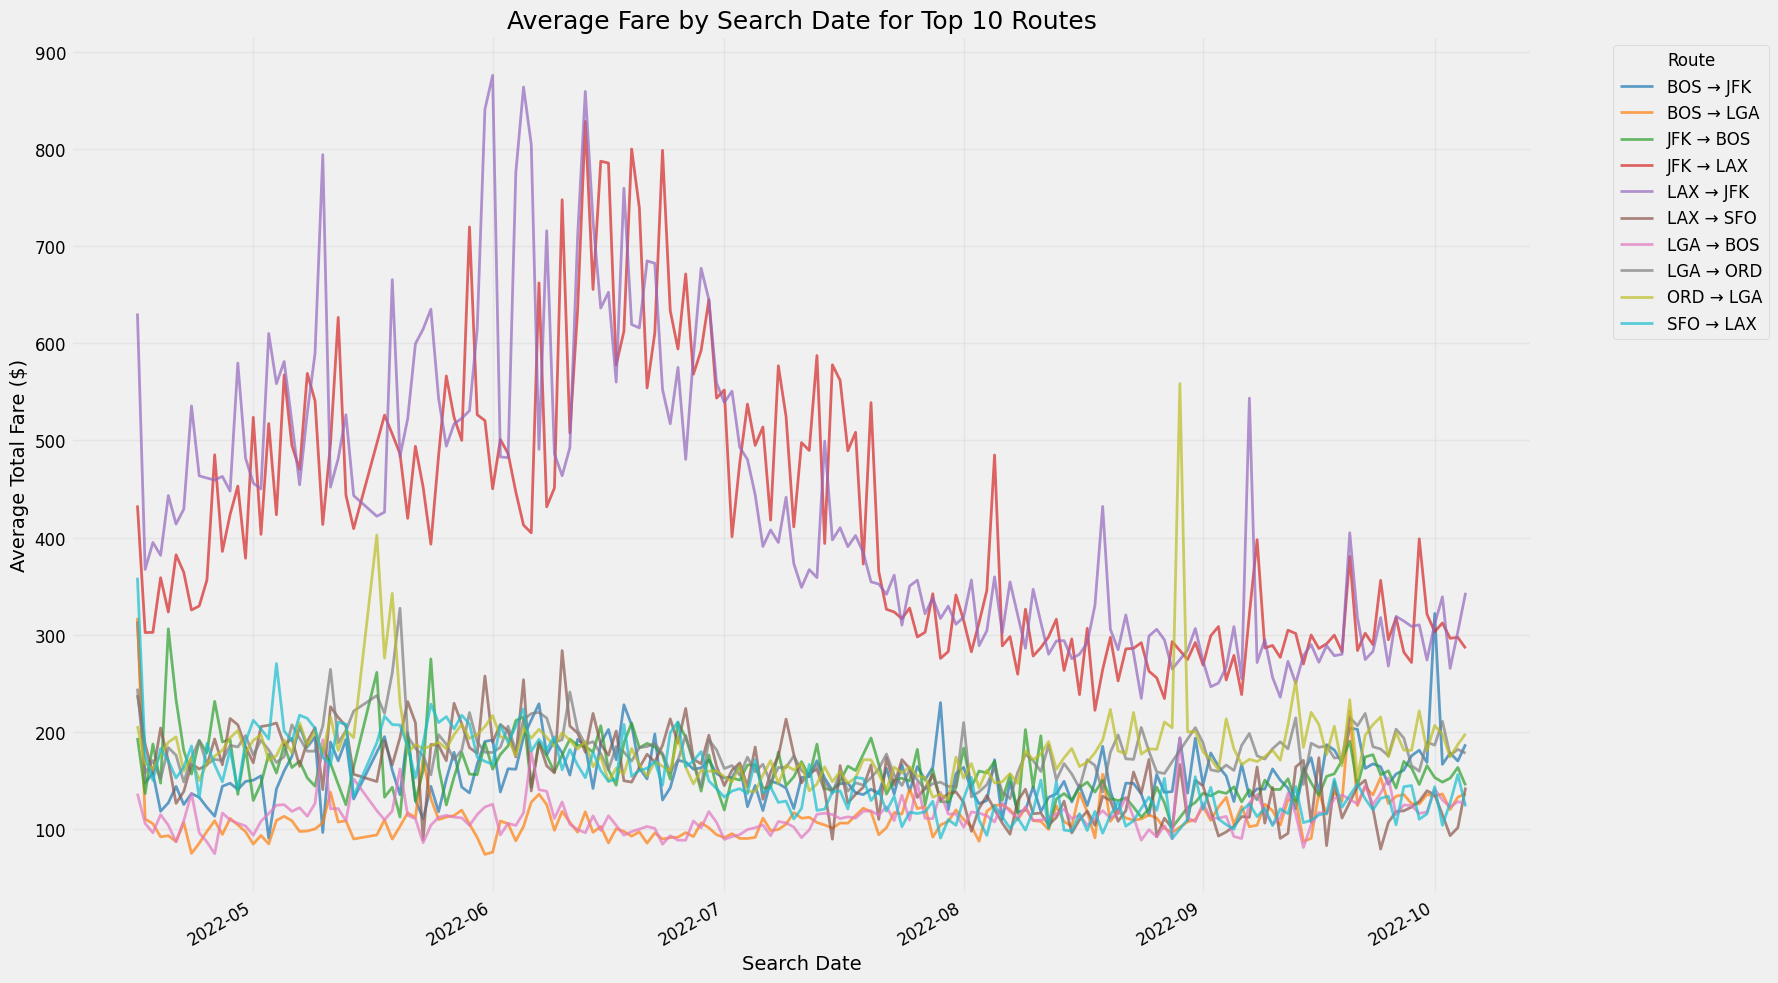

<Figure size 2000x2500 with 0 Axes>

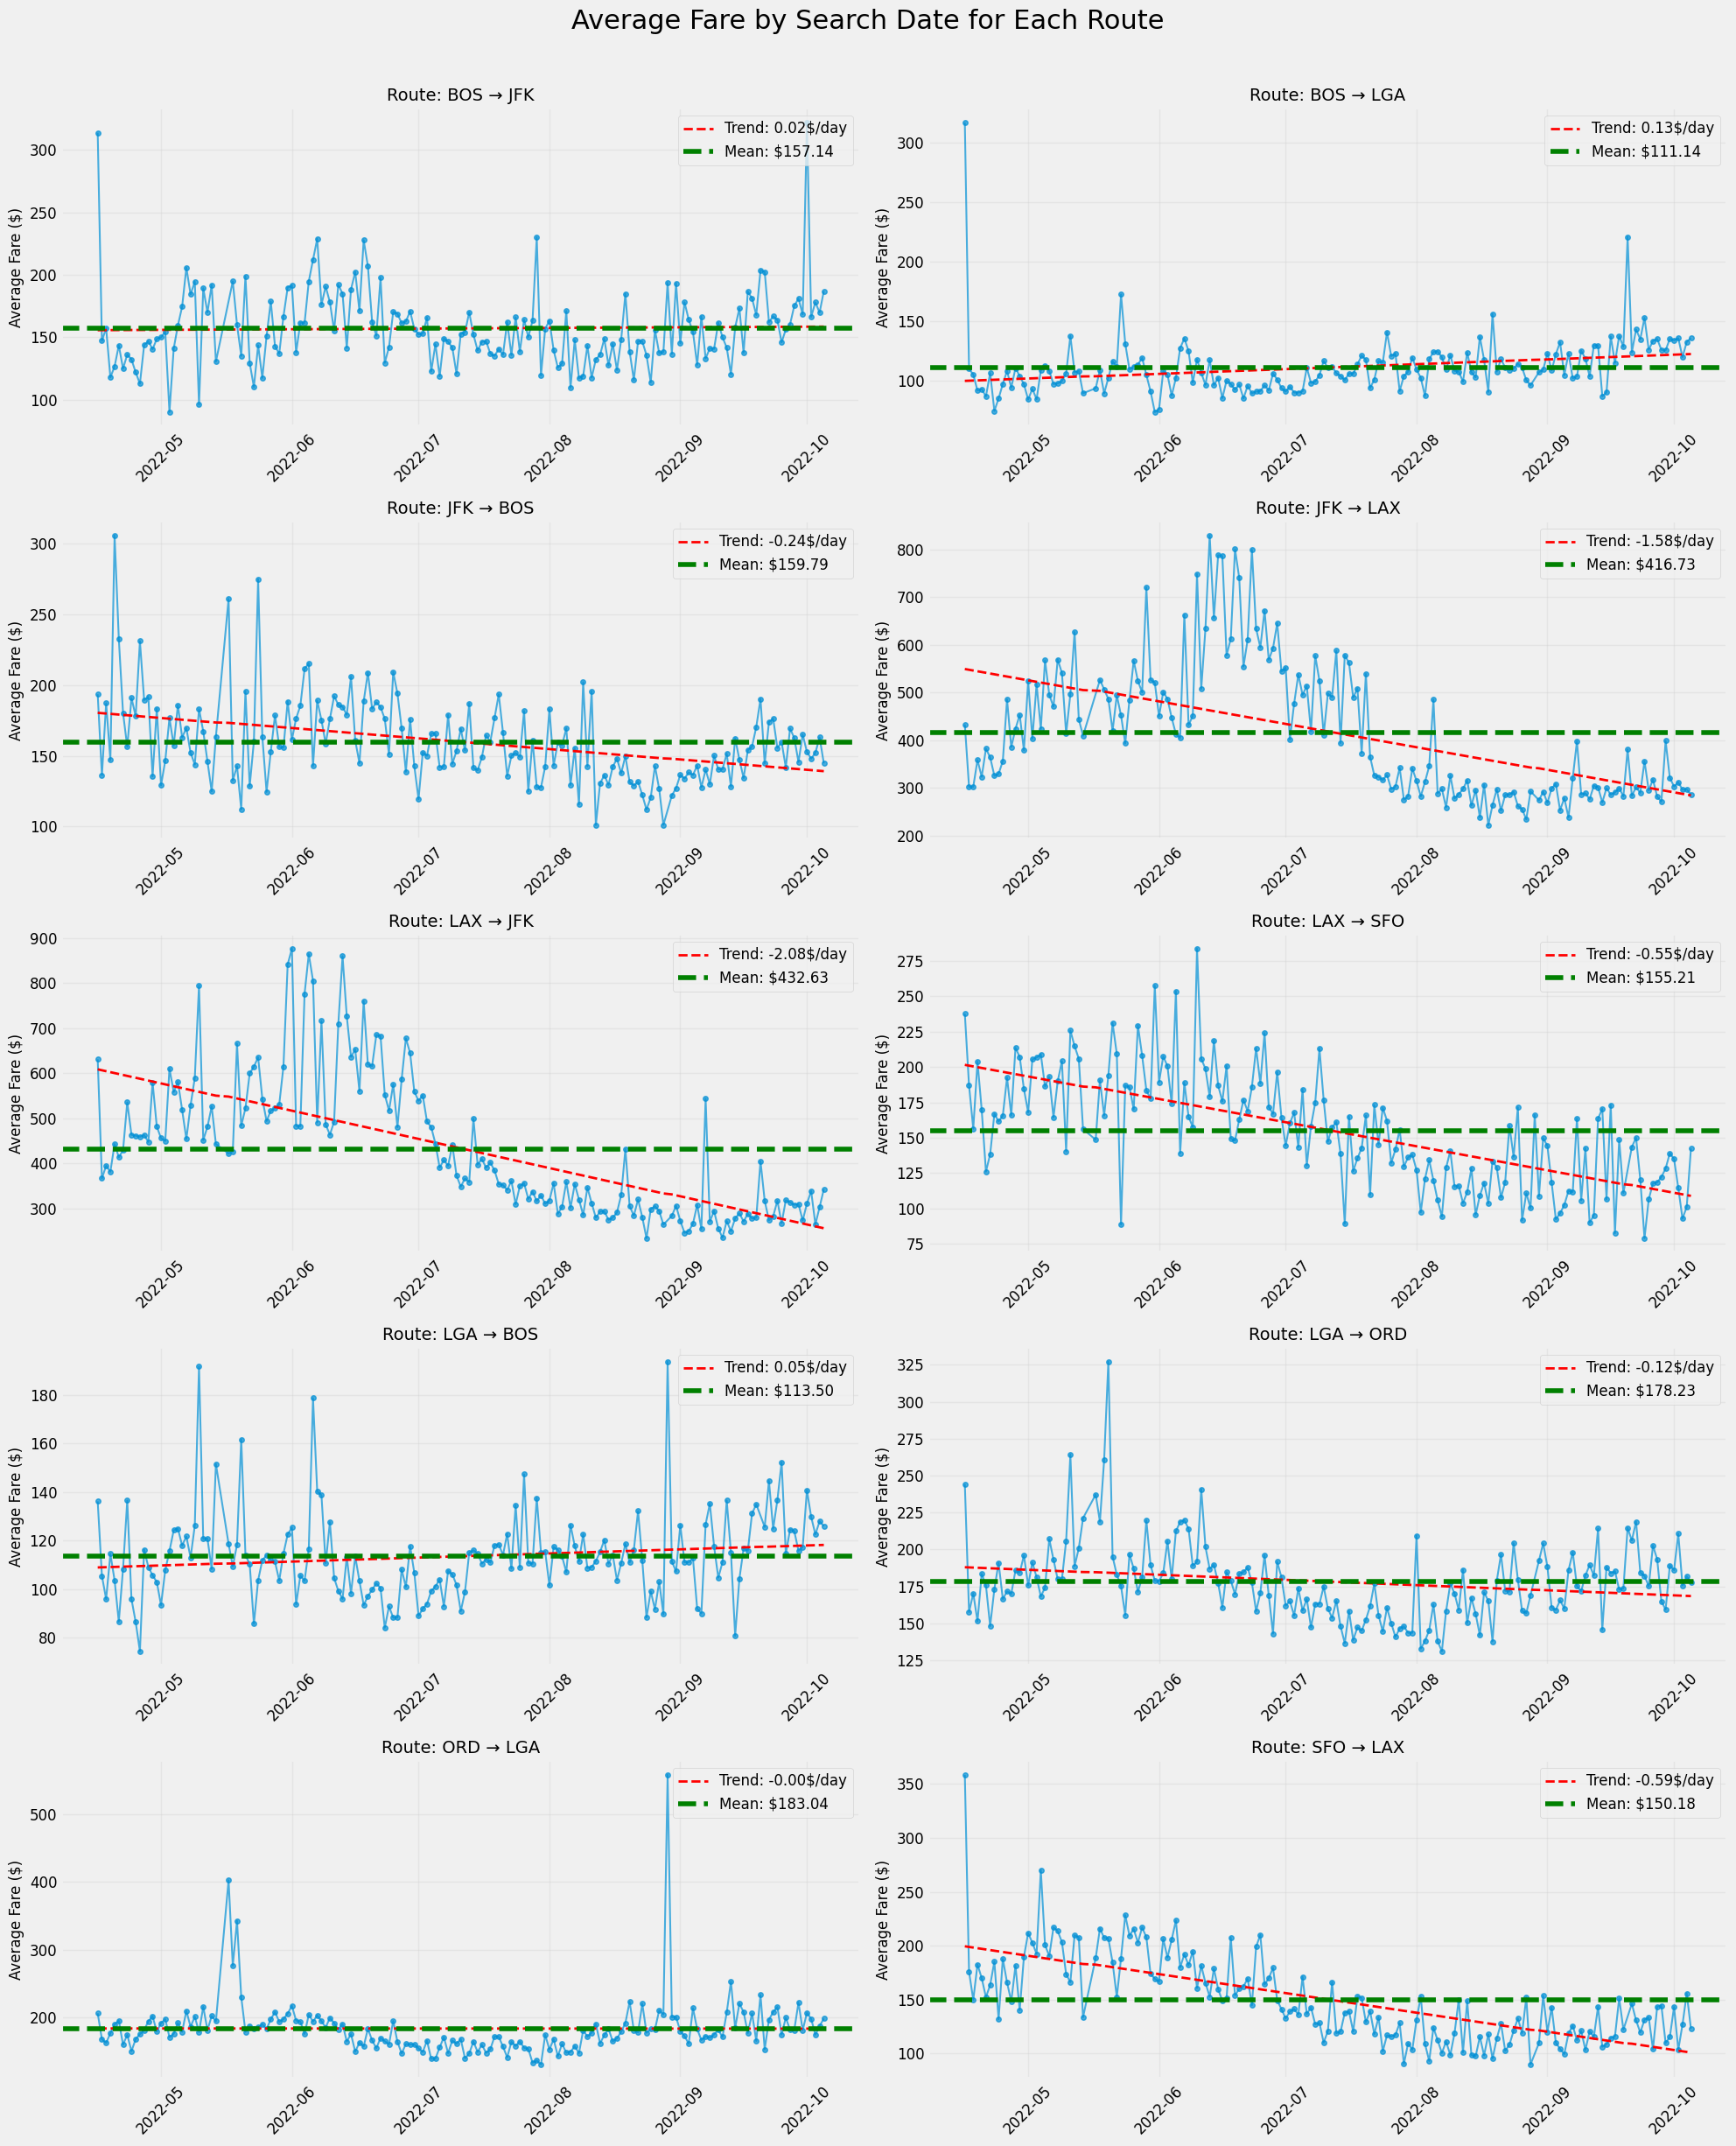

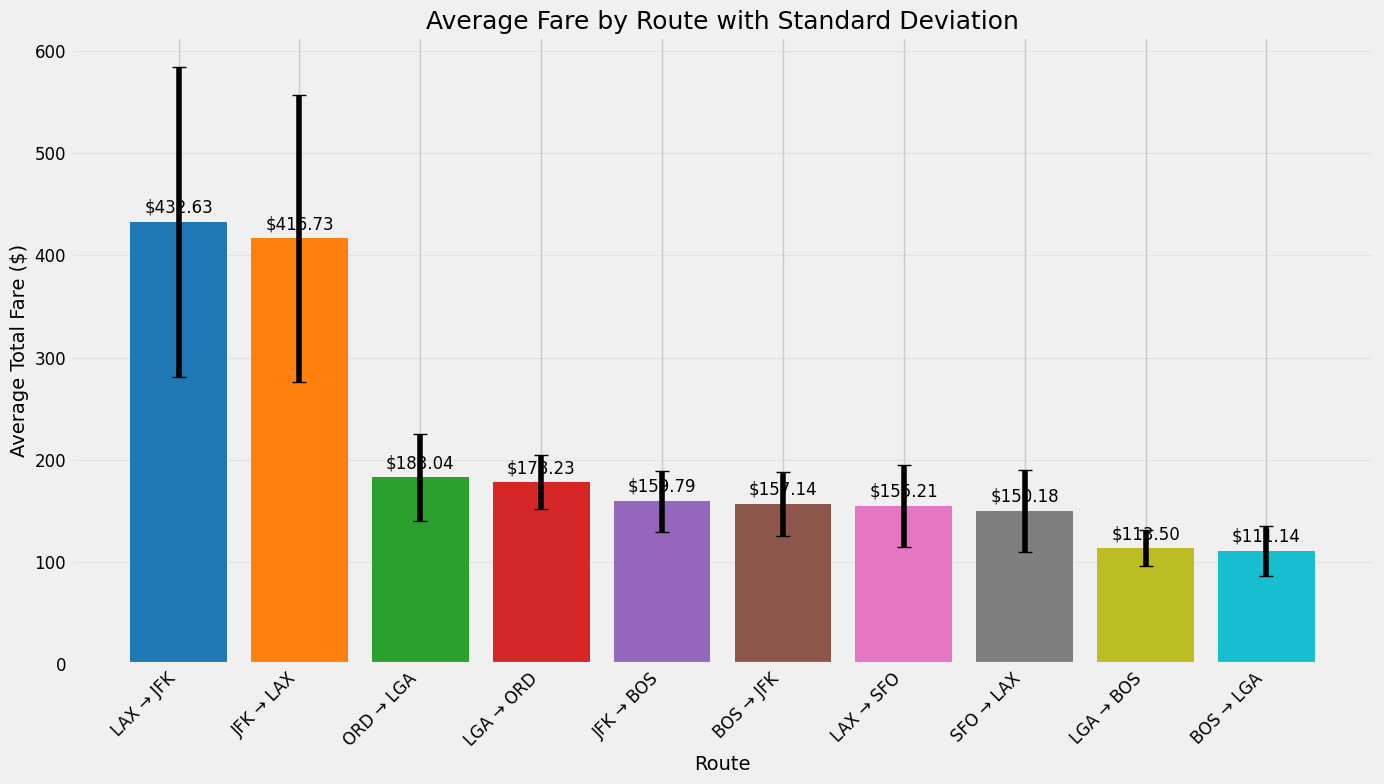

In [31]:
# Create a new DataFrame with average fare by search date and route
route_search_fare = df[df.set_index(['startingAirport', 'destinationAirport']).index.isin(top_routes_list)]
route_search_fare = route_search_fare.groupby(['searchDate', 'startingAirport', 'destinationAirport'])['totalFare'].mean().reset_index()

# Convert searchDate to datetime
route_search_fare['searchDate'] = pd.to_datetime(route_search_fare['searchDate'])

# Create a route label for better readability
route_search_fare['route'] = route_search_fare['startingAirport'] + ' → ' + route_search_fare['destinationAirport']

# Plot with multiple lines - one for each route
plt.figure(figsize=(18, 10))

# Get a nice colormap with distinct colors
colors = plt.cm.tab10(range(len(top_routes_list)))

# Plot each route with a different color
for i, route in enumerate(route_search_fare['route'].unique()):
    route_data = route_search_fare[route_search_fare['route'] == route]
    plt.plot(route_data['searchDate'], route_data['totalFare'], 
             label=route, marker='', linewidth=2, alpha=0.7, color=colors[i])

plt.title('Average Fare by Search Date for Top 10 Routes', fontsize=18)
plt.xlabel('Search Date', fontsize=14)
plt.ylabel('Average Total Fare ($)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend(title='Route', bbox_to_anchor=(1.05, 1), loc='upper left')

# Improve x-axis date formatting
plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.show()

# Create subplots - one plot for each route
plt.figure(figsize=(20, 25))
fig, axes = plt.subplots(5, 2, figsize=(20, 25))
axes = axes.flatten()

# Plot each route on its own subplot
for i, route in enumerate(route_search_fare['route'].unique()):
    if i < 10:  # Just in case there are more routes
        route_data = route_search_fare[route_search_fare['route'] == route]
        
        # Add scatter and line plot
        axes[i].plot(route_data['searchDate'], route_data['totalFare'], 
                     marker='o', markersize=4, linewidth=1.5, alpha=0.7)
        
        # Add a trend line
        if len(route_data) > 1:  # Need at least 2 points for trendline
            z = np.polyfit(range(len(route_data)), route_data['totalFare'], 1)
            p = np.poly1d(z)
            axes[i].plot(route_data['searchDate'], p(range(len(route_data))), 
                       "r--", linewidth=2, label=f"Trend: {z[0]:.2f}$/day")
        
        # Set subplot title and labels
        axes[i].set_title(f'Route: {route}', fontsize=14)
        axes[i].set_ylabel('Average Fare ($)', fontsize=12)
        axes[i].grid(True, alpha=0.3)
        
        # Format x-axis dates
        axes[i].tick_params(axis='x', rotation=45)
        
        # Add mean fare line
        mean_fare = route_data['totalFare'].mean()
        axes[i].axhline(y=mean_fare, color='g', linestyle='--', 
                       label=f'Mean: ${mean_fare:.2f}')
        axes[i].legend(loc='upper right')

plt.suptitle('Average Fare by Search Date for Each Route', fontsize=22)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

# Calculate statistics for each route
route_stats = route_search_fare.groupby('route')['totalFare'].agg(['mean', 'min', 'max', 'std']).sort_values('mean', ascending=False)

# Add the count of data points
route_counts = route_search_fare.groupby('route').size()
route_stats['count'] = route_counts

# Display the stats
plt.figure(figsize=(14, 8))
bars = plt.bar(route_stats.index, route_stats['mean'], color=colors[:len(route_stats)])

# Add std error bars
plt.errorbar(route_stats.index, route_stats['mean'], yerr=route_stats['std'], fmt='none', ecolor='black', capsize=5)

# Add data labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 5,
             f'${height:.2f}', ha='center', va='bottom', rotation=0)

plt.title('Average Fare by Route with Standard Deviation', fontsize=18)
plt.xlabel('Route', fontsize=14)
plt.ylabel('Average Total Fare ($)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()